# Project 3: Term Deposit Sale Ensemble Project
 
 

## Domain:
Banking

 

## Context / Goal
Using the data collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio.

 

## Attribute Information:
    
    Bank client data:
    1. age: Continuous feature
    2. job: Type of job (management, technician, entrepreneur, blue-collar, etc.)
    3. marital: marital status (married, single, divorced)
    4. education: education level (primary, secondary, tertiary)
    5. default: has credit in default?
    6. housing: has housing loan?
    7. loan: has personal loan?
    8. balance in account
    
    Related to previous contact:
    9. contact: contact communication type
    10. month: last contact month of year
    11. day: last contact day of the month
    12. duration: last contact duration, in seconds*
    
    Other attributes:
    13. campaign: number of contacts performed during this campaign and for this client
    14. pdays: number of days that passed by after the client was last contacted from a previous campaign (-1 tells us the person has not been contacted or contact period is beyond 900 days)
    15. previous: number of times the client has been contacted before for the last campaign to subscribe term deposit
    16. poutcome: outcome of the previous marketing campaign
    
    Output variable (desired target):
    17. Target: Tell us has the client subscribed a term deposit. (Yes, No)
 
 
 
## Steps and tasks:

Deliverable – 1 (Exploratory data quality report reflecting the following) – (20)

1. Univariate analysis (12 marks)
a. Univariate analysis – data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers.
b. Strategies to address the different data challenges such as data pollution, outlier’s treatment and missing values treatment.
c. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots.

2. Multivariate analysis (8 marks)
a. Bi-variate analysis between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes.
b. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots
Deliverable – 2 (Prepare the data for analytics) – (10)

1. Ensure the attribute types are correct. If not, take appropriate actions.
2. Get the data model ready.
3. Transform the data i.e. scale / normalize if required
4. Create the training set and test set in ratio of 70:30

Deliverable – 3 (create the ensemble model) – (30)
1. First create models using Logistic Regression and Decision Tree algorithm. Note the model performance by using different matrices. Use confusion matrix to evaluate class level metrics i.e. Precision/Recall. Also reflect the accuracy and F1 score of the model. (10 marks)

2. Build the ensemble models (Bagging and Boosting) and note the model performance by using different matrices. Use same metrics as in above model. (at least 3 algorithms) (15 marks)

Proprietary content. ©Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited
3. Make a DataFrame to compare models and their metrics. Give conclusion regarding the best algorithm and your reason behind it. (5 marks)

# Coding Starts Here

## Import Libraries and Load Dataset and do basic data checks

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Lets import everything we will need
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

#importing seaborn for statistical plots
import seaborn as sns

#To break the X and y dataframes into training set and test set we will need
#Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split
import numpy as np
from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn import metrics
import pandas_profiling
import graphviz
import pydotplus

#Importing all the Sklearn functions and yellowbrick functions.
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, LabelEncoder
from yellowbrick.classifier import ClassificationReport, ROCAUC
plt.style.use('ggplot')
pd.options.display.float_format = '{:,.2f}'.format
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [3]:
#Lets load the Data csv file and look at the data
bank_data = pd.read_csv('bank-full.csv')
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
#Lets  take a deeper look and draw some insights- info,shape, statistical summary, null check, incorrect imputation for bank Data

bank_data.info()
print('')
print ('shape:', bank_data.shape)
print('')
print('size:', bank_data.size)

print(' ')

# check if there are any missing values in bank data via boolean
print("show the bank data with boolean: \n", bank_data.isnull())

# Count total NaN / missing values at each column for bank data
print(" \nCount total missing values at each column in a DataFrame : \n\n"), 
print( pd.DataFrame(bank_data.isnull().sum(), columns = ['Number of missing values']))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB

shape: (45211, 17)

size: 768587
 
show the bank data with boolean: 
          age    job  marital

Insights:

There are 45211 rows of data with 16 independent features/columns and 1 dependent target variable. There seems there are no Null values.

Also there seems be a mixture of continuos variables and classification/categorical vaiables. we will have to analyze further on how to utilize these variables

In [5]:
#Analysing the distribution of the various continuous attributes like min, max, mean, count, 25th percentile, median, 75th percentile
bank_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,"45,211.00",40.94,10.62,18.00,33.00,39.00,48.00,95.00
balance,"45,211.00","1,362.27","3,044.77","-8,019.00",72.00,448.00,"1,428.00","102,127.00"
day,"45,211.00",15.81,8.32,1.00,8.00,16.00,21.00,31.00
duration,"45,211.00",258.16,257.53,0.00,103.00,180.00,319.00,"4,918.00"
campaign,"45,211.00",2.76,3.10,1.00,1.00,2.00,3.00,63.00
pdays,"45,211.00",40.20,100.13,-1.00,-1.00,-1.00,-1.00,871.00
previous,"45,211.00",0.58,2.30,0.00,0.00,0.00,0.00,275.00


Insights

There seems to be some negative valies for balance, but should be OK as a customer can go negative/credit in their account. pdays is also negative but that is also expected. we will look at this feature in upcoming analysis and maybe replace it with a better value.

I want to take a look at the median and mode as well

In [6]:
bank_data.median()

age         39.00
balance    448.00
day         16.00
duration   180.00
campaign     2.00
pdays       -1.00
previous     0.00
dtype: float64

In [7]:
bank_data.mode()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,32,blue-collar,married,secondary,no,0,yes,no,cellular,20,may,124,1,-1,0,unknown,no


It seems mode of the values in poutcome are "unknown" which means majority of them are "unknown". It will probably be better to completely remove it. we will do that later

# Start of EDA and Univariate and Bivariate Analysis

In this EDA section, I am going to try to further understand the data by doing Statistical, Univariate and Bivariate Analysis. While doing this analysis I will remove or add columns/data that is not relevant or relevant for this modelling. By the end of the EDA, the objective will be to be ready with the Data model or models in case i want to have several models to compare.

In [8]:
#Lets do a quick check again on the data
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


    As we can see there are either int64 datatypes or object datatypes.
    Lets quickly convert all the object datatypes to category datatypes before we start our analysis

In [9]:
for feature in bank_data.columns: # Loop through all columns in the dataframe
    if bank_data[feature].dtype == 'object': # Only apply for columns with categorical strings
        bank_data[feature] = pd.Categorical(bank_data[feature])# Replace strings with an integer
bank_data.info()
bank_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  Target     45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


Everything looks fine

In [10]:
#Lets quickly build columns list of continuous and classification variables (object) so we can use them in following code.

bd_class = ['job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month','poutcome', 'Target']

bd_disc = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous']

In [11]:
#Number of unique in each column? 
bank_data.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

The uniqueness is as expected. for the categorical variables we have few values and for continuos variables we expectedly have more. the variable previous is bit strange as it is a continuos variable but has vey low number of unique values. it might be becuase a certian value like "-1" repeats a lot. we will check further in the graphs

In [12]:
#Lets doa a quick Value counts of all columns to try to identify which of them are categorical columns. 
#I will also do some plotting once I
#have a better idea which ones are the categorical columns

for i in bd_class:
      print(bank_data[i].value_counts())
      print() 

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

no     44396
yes      815
Name: default, dtype: int64

yes    25130
no     20081
Name: housing, dtype: int64

no     37967
yes     7244
Name: loan, dtype: int64

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype:

Some Insights:

- most of the features other than "contact" loook like ordinal and we can assign them integer values later. for others we can do label encoding or one hot columns encoding
- for feature "poutcome" around 80% values are unknown. we are betting of dropping this column as it does not tell us much and there is no point replacing 80% of the values
- "contact" feature also has a lot of unknown. we will do some more analysis before deciding whether to keep it or drop it.
- "education" also has unknown values but it is much smaller set and we can probaly replace them with mode
- we will try to inpute different values for unknown in the following segments and then also try to put some of them in bins that make sense.

Lets also check the measures of dispersion including skewness of the data and also any correlation between the fields that we can identify

In [13]:
#Lets check the skewness of the dat
bank_data.skew()

age         0.68
balance     8.36
day         0.09
duration    3.14
campaign    4.90
pdays       2.62
previous   41.85
dtype: float64

Balance, duration, campaign and previous are highly skewed data. we will try to reduce the skewness for the logistic regression model. For decision tree and related models it does not really matter. 

Now, lets take a look at some graphs and draw inferences

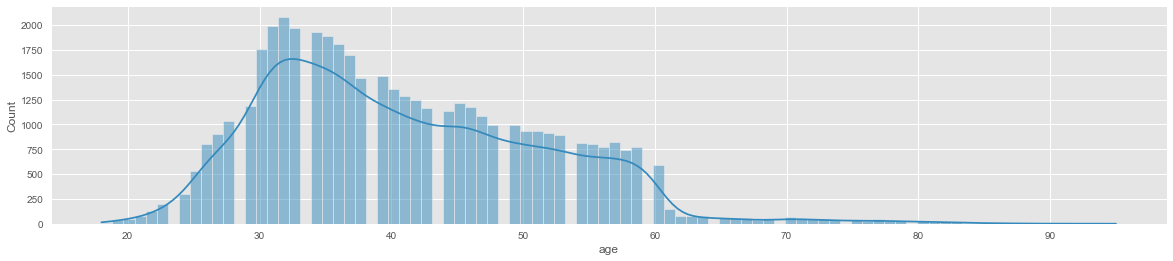

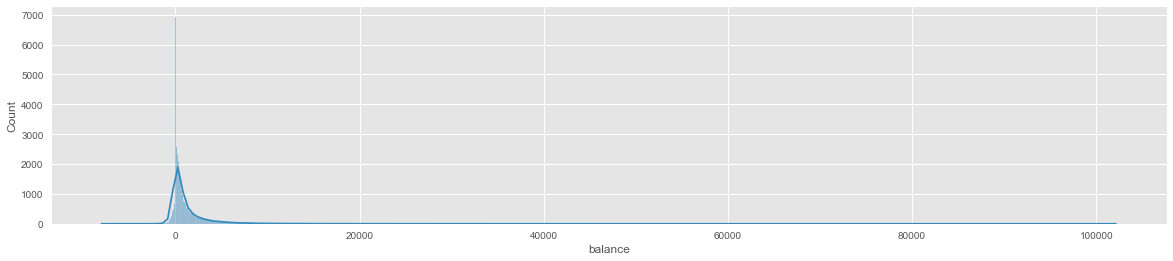

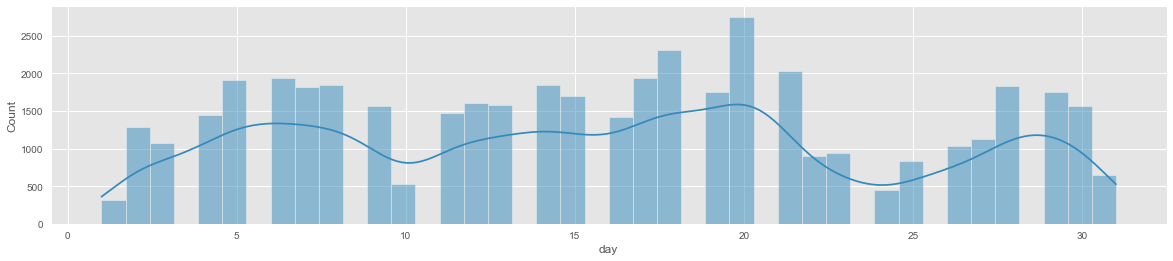

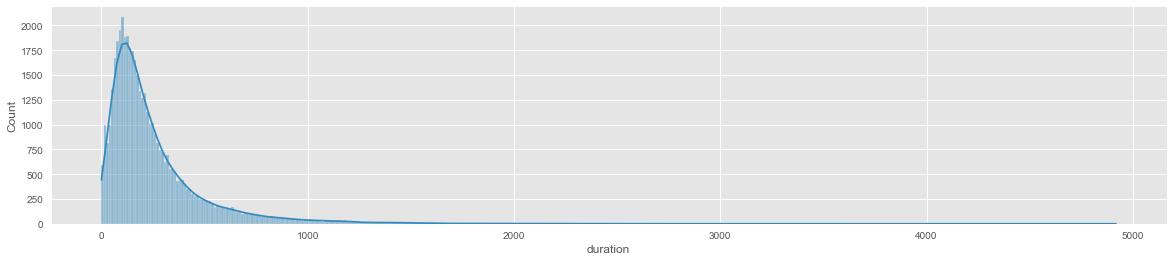

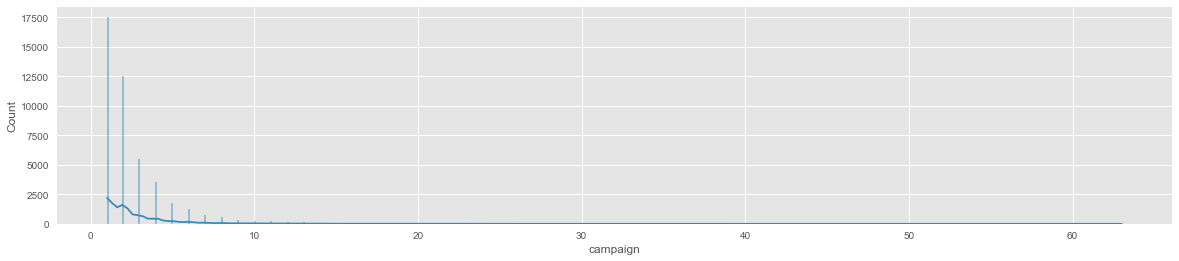

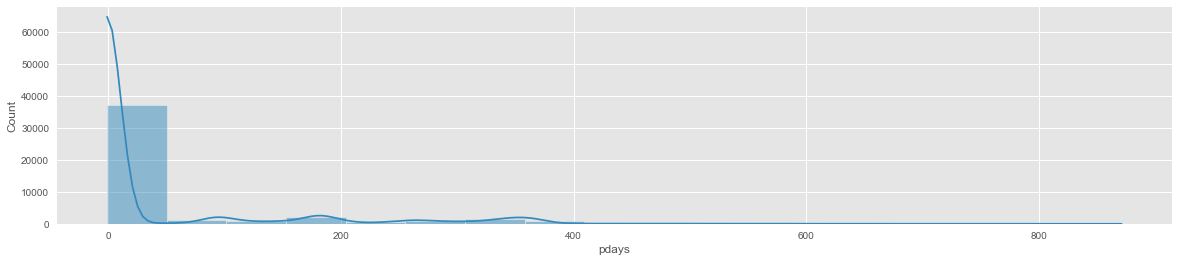

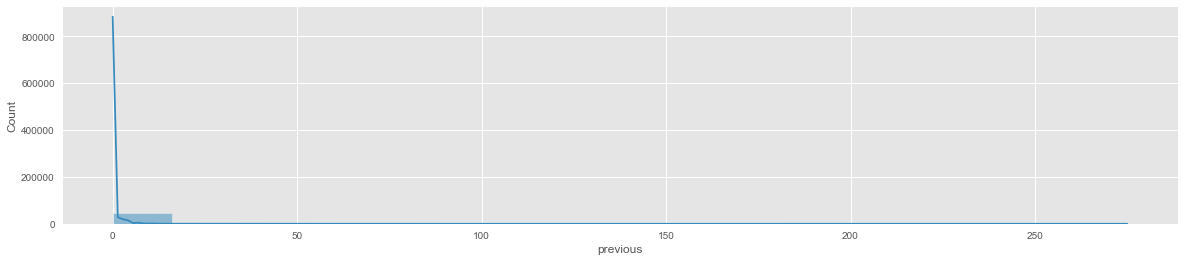

In [14]:
# distplot for continous columns
for i in bd_disc:
    plt.figure(figsize=(20,4))
    sns.histplot(bank_data[i], kde = True)
    plt.show()

The graph proves the skewness for the some of the data as we suspected it before. we will reduce the skewness by using some skleran transformation functions for the Logistic regression model. 

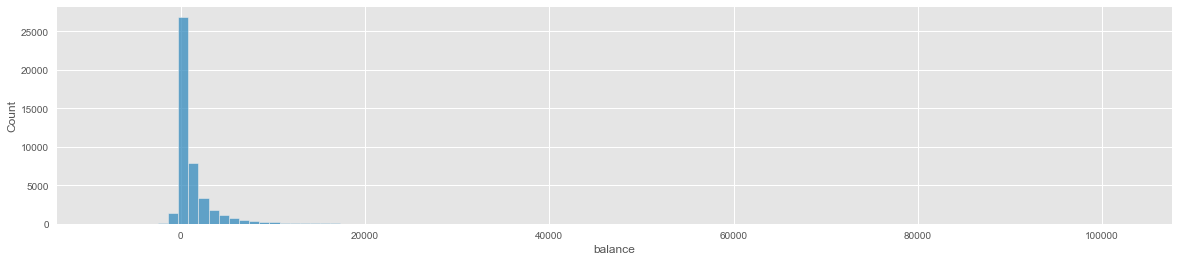

In [15]:
#Lets also look at histogram with bins incase we need to do binning later
plt.figure(figsize=(20,4))
sns.histplot(data=bank_data, x="balance", bins=100)

Most of the balances are centered around being 0 with some customers having bigger balances. we can do binning but i will like to try to the model without it.

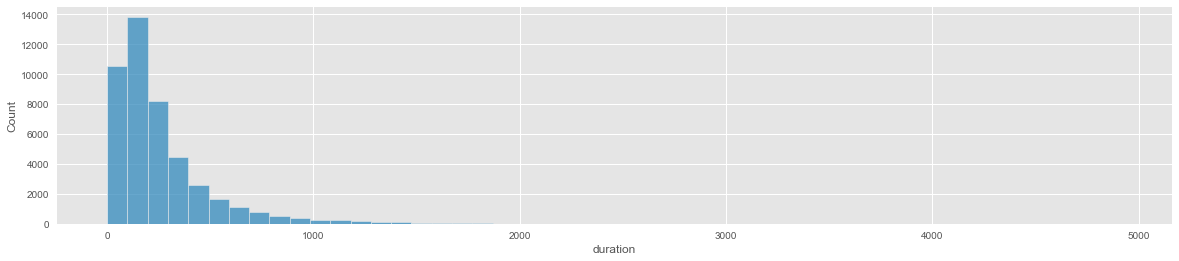

In [16]:
 plt.figure(figsize=(20,4))
sns.histplot(data=bank_data, x="duration", bins=50)

Most of the durations are centered around being 0 or being very short. Ther are some customer that had longer duration calls. we can do binning but i will like to try to the model without it.

This proves our data is highly skewed and we might need some transformation/nomalization for the logistic regression model. for decision tree related models we should be OK.

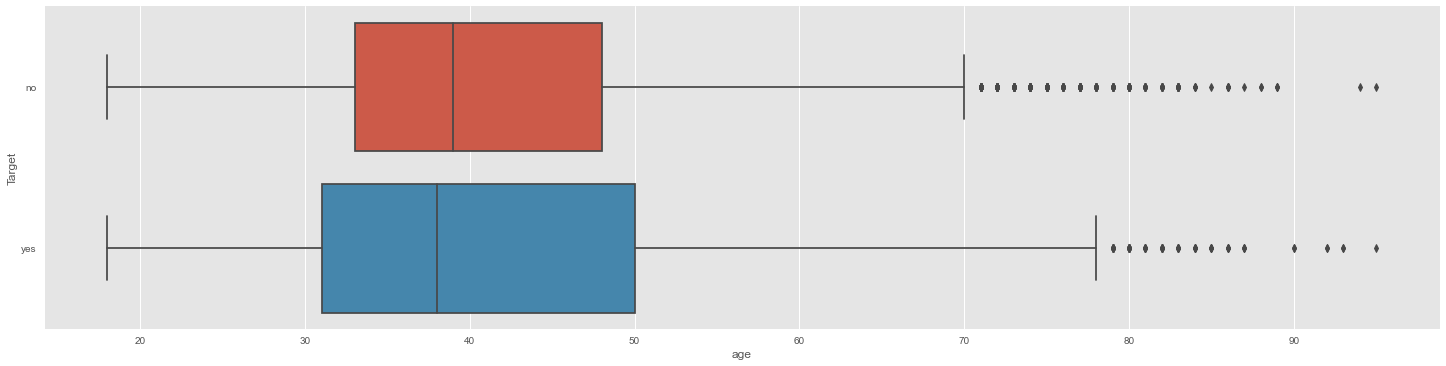

<Figure size 1440x288 with 0 Axes>

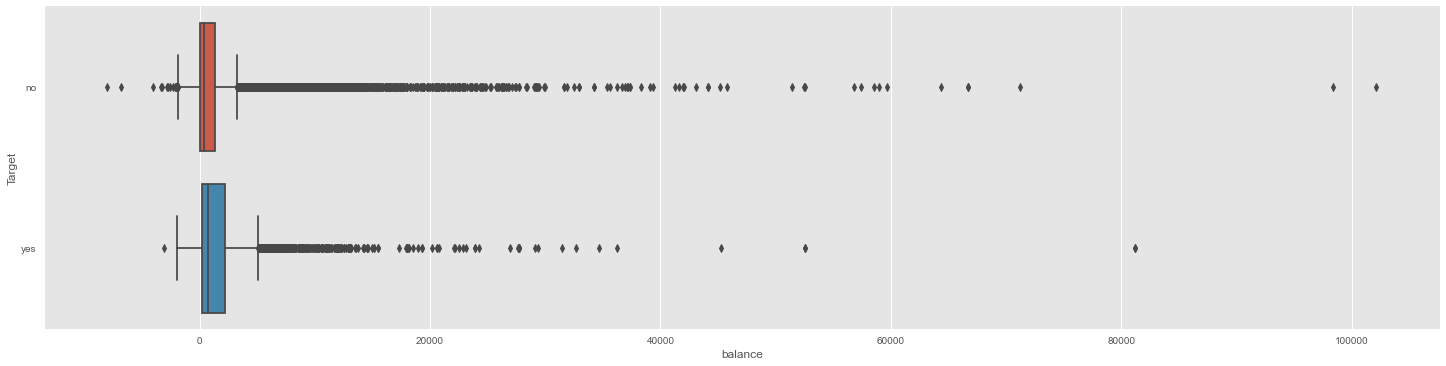

<Figure size 1440x288 with 0 Axes>

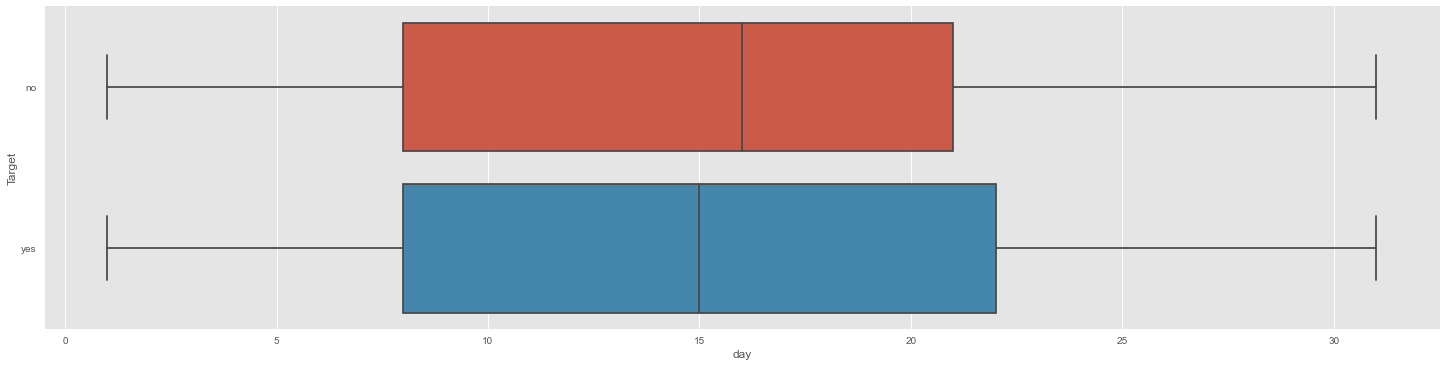

<Figure size 1440x288 with 0 Axes>

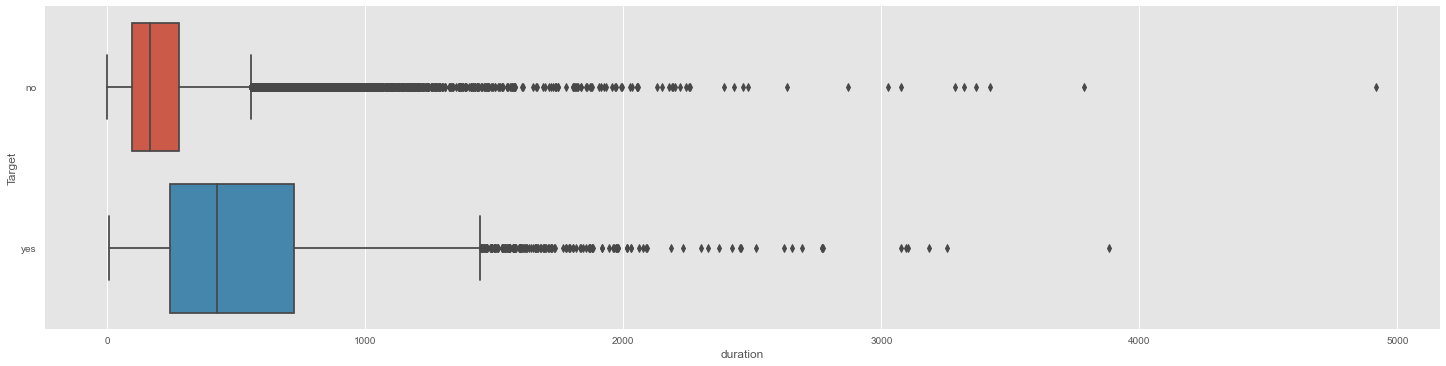

<Figure size 1440x288 with 0 Axes>

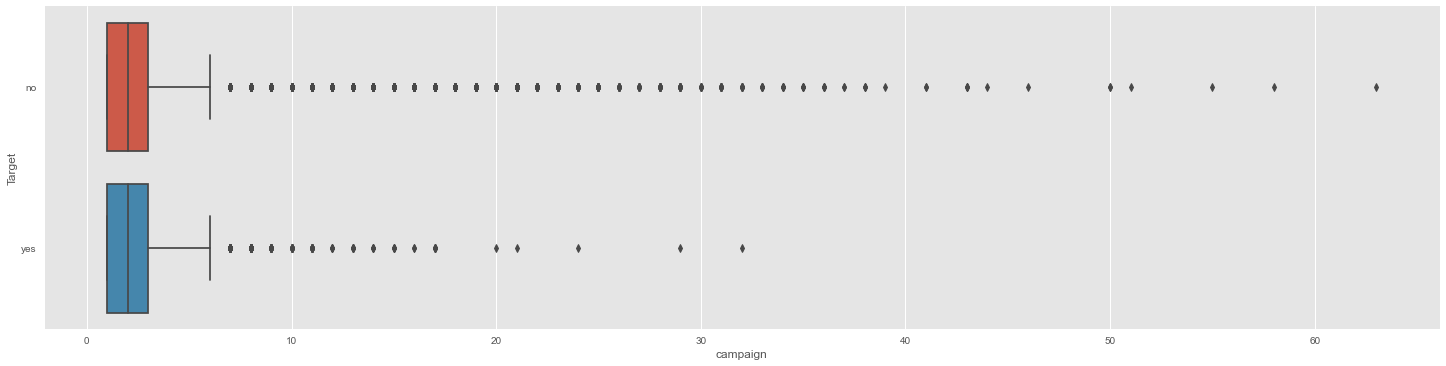

<Figure size 1440x288 with 0 Axes>

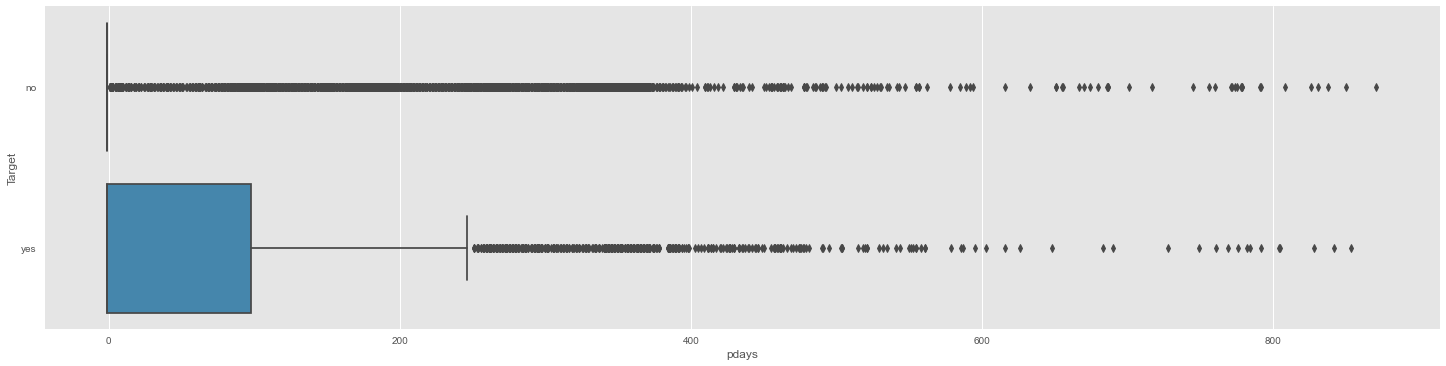

<Figure size 1440x288 with 0 Axes>

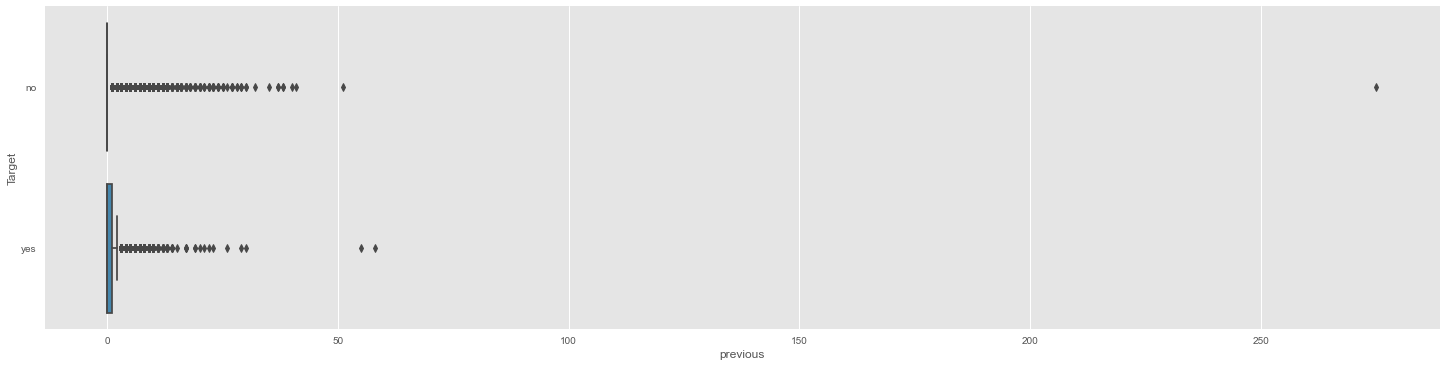

<Figure size 1440x288 with 0 Axes>

In [17]:
# distplot for continous columns
for i in bd_disc:
    sns.catplot(x =bank_data[i], y = 'Target', kind = 'box',data= bank_data, aspect = 4, orient = 'h')
    plt.figure(figsize=(20,4))
    plt.show()


Insights

- "Balance", "pdays", "previous"" duration" seems to be very very skewed. Maybe we can reduce the skeness by doing some log transform. we can check and see how that goes
- "Day" does not seem to make a difference for the target. we will do some more bivariate analysis to verify
- "Previous" seems to have one bad outlier. we will remove that




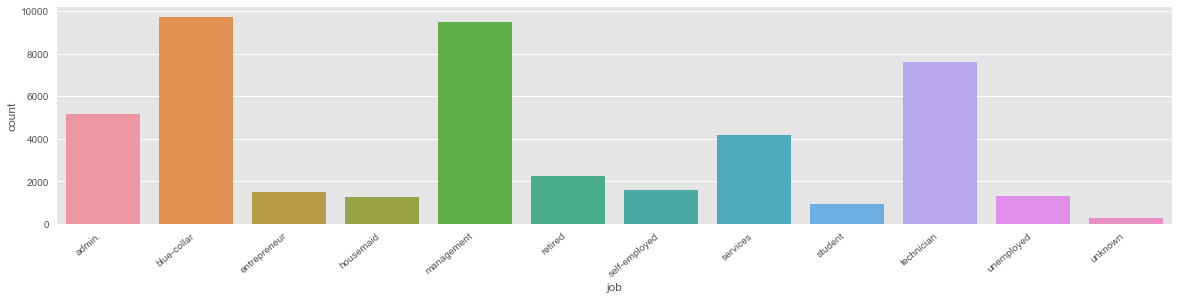

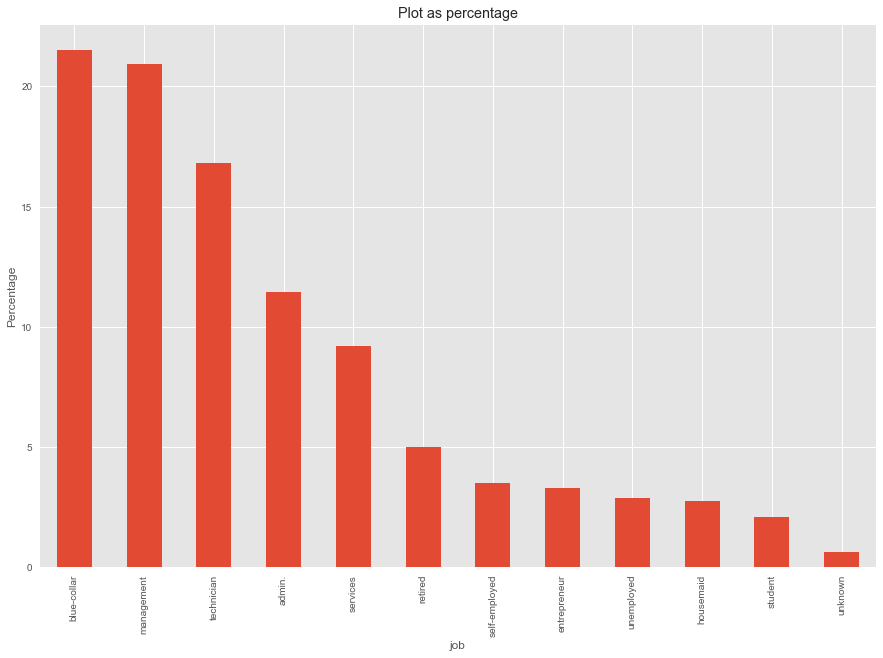

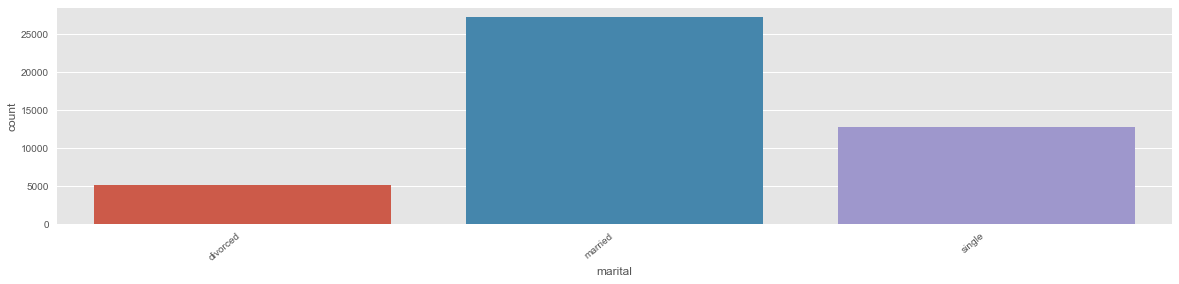

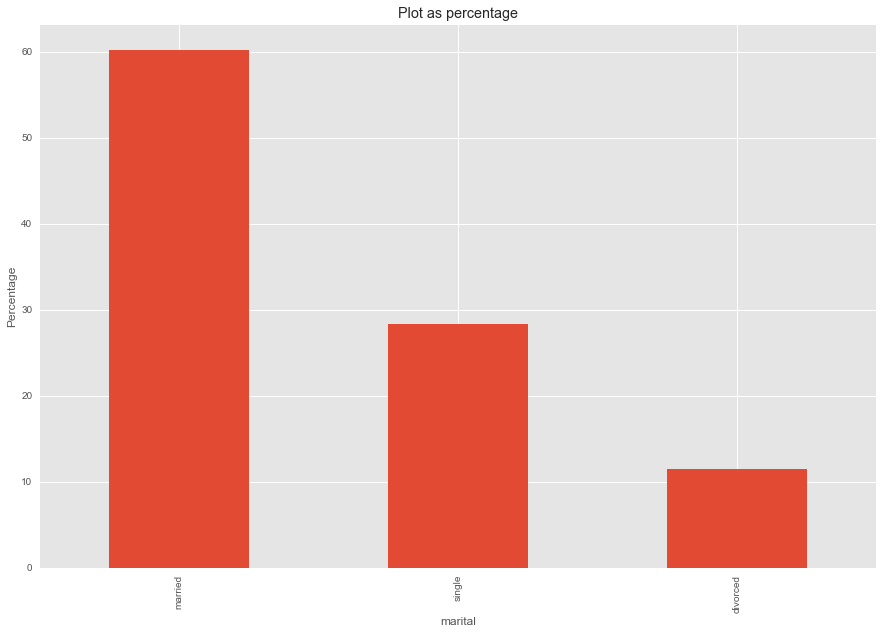

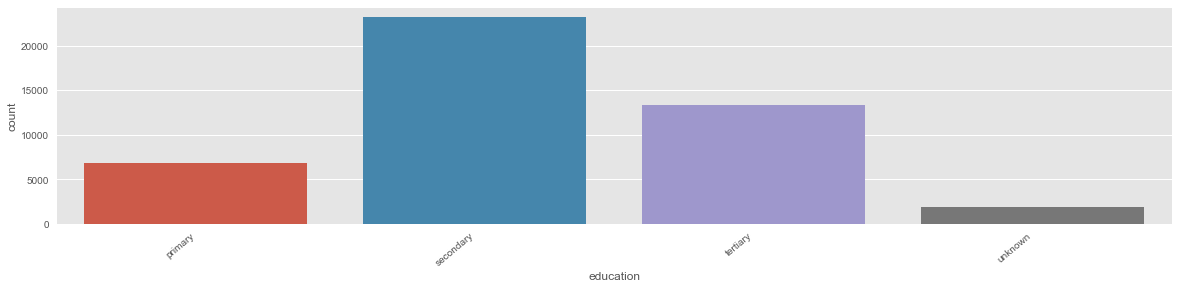

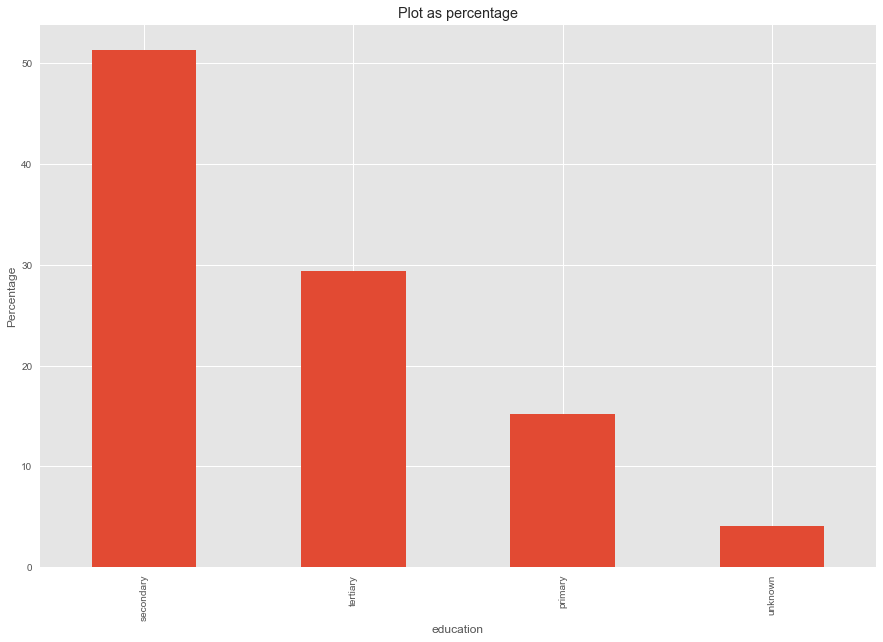

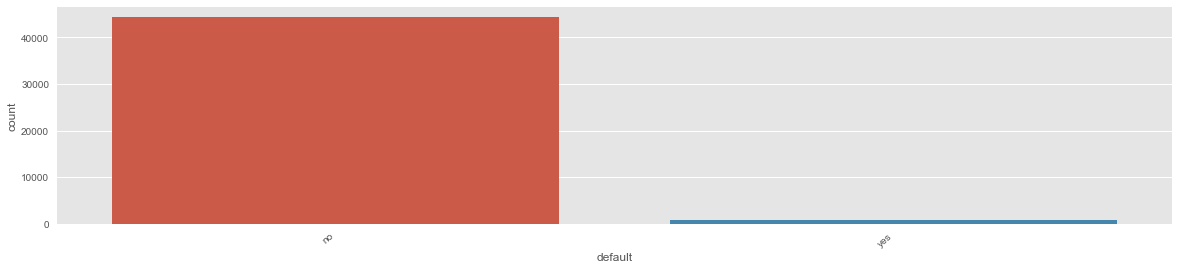

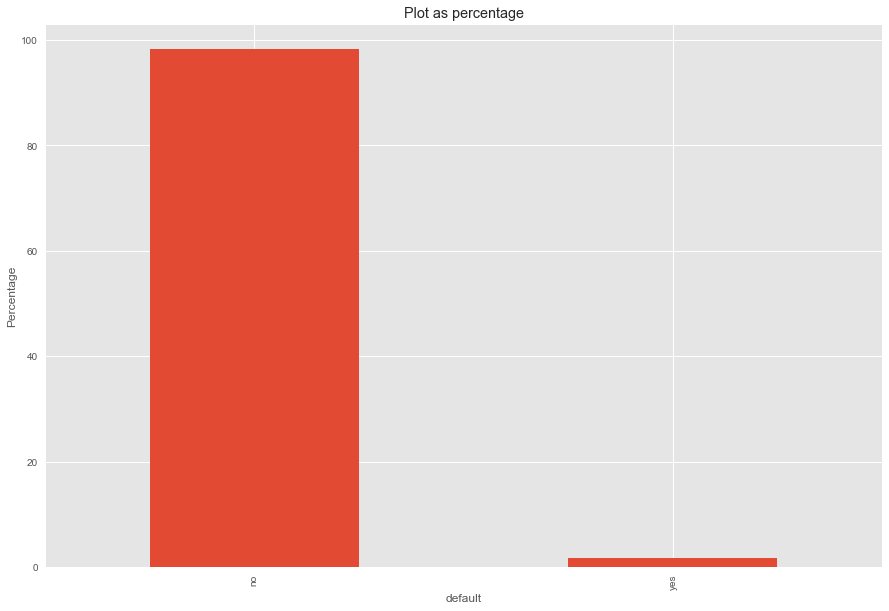

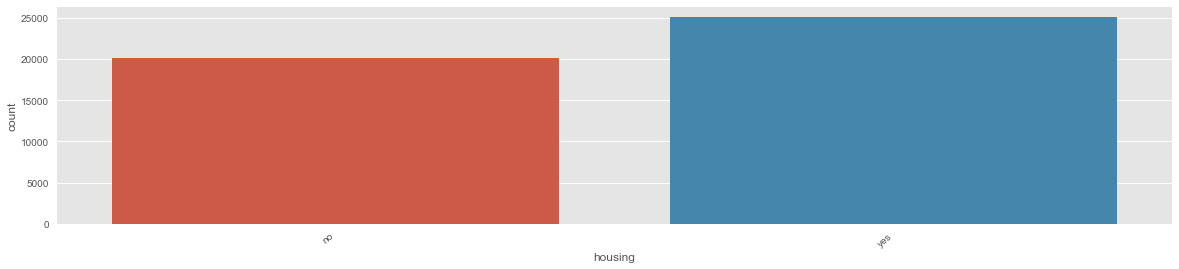

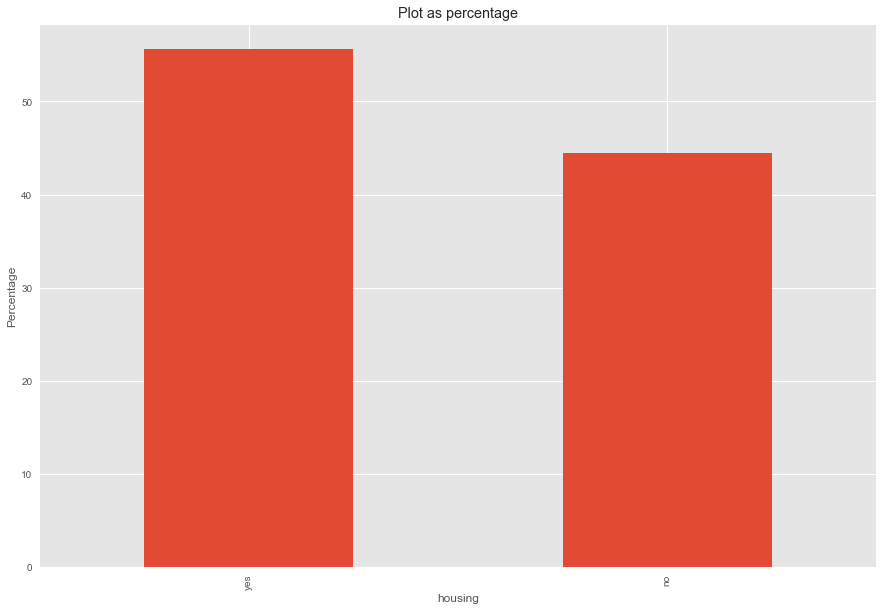

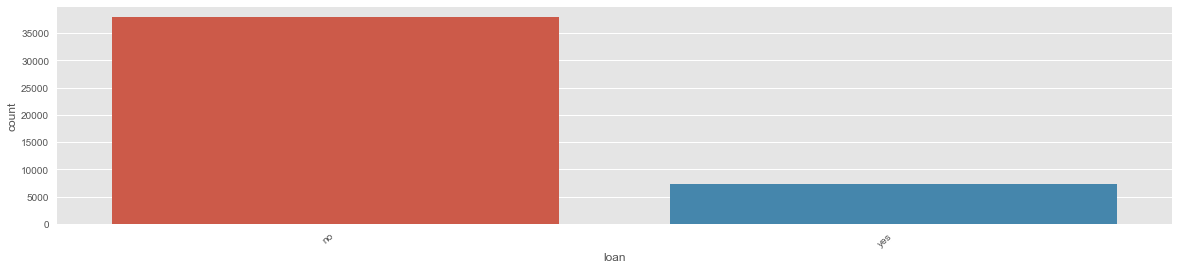

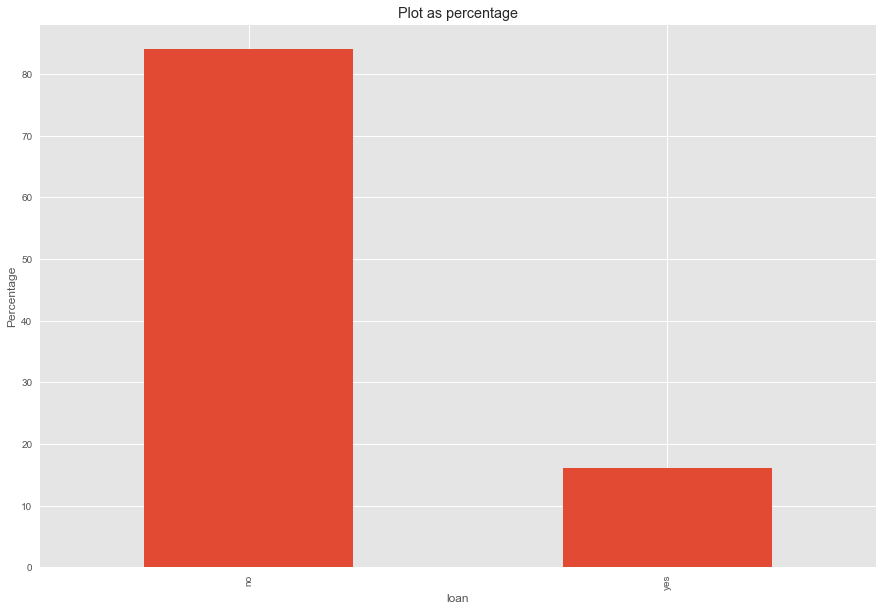

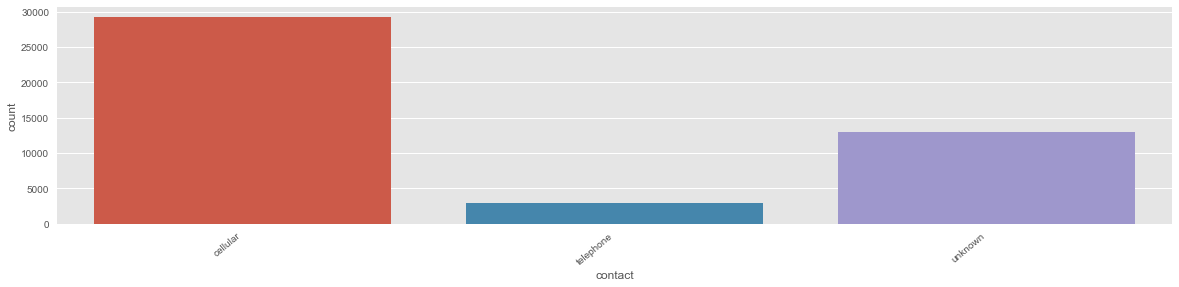

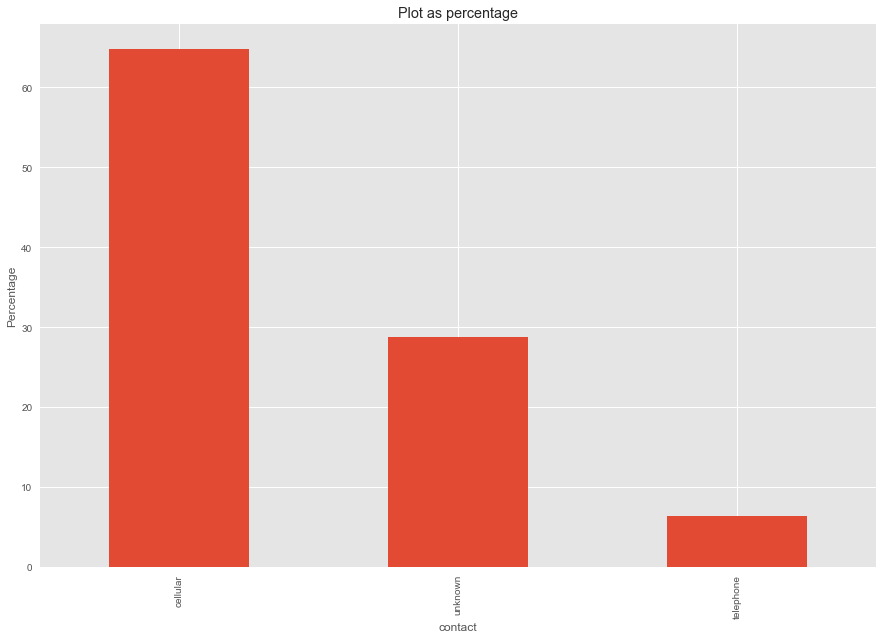

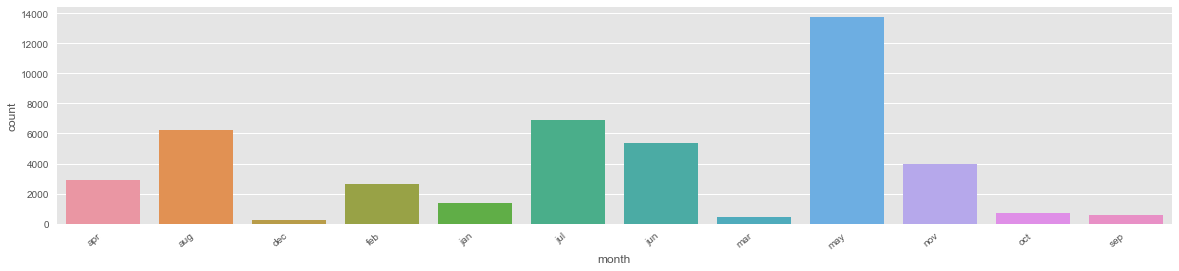

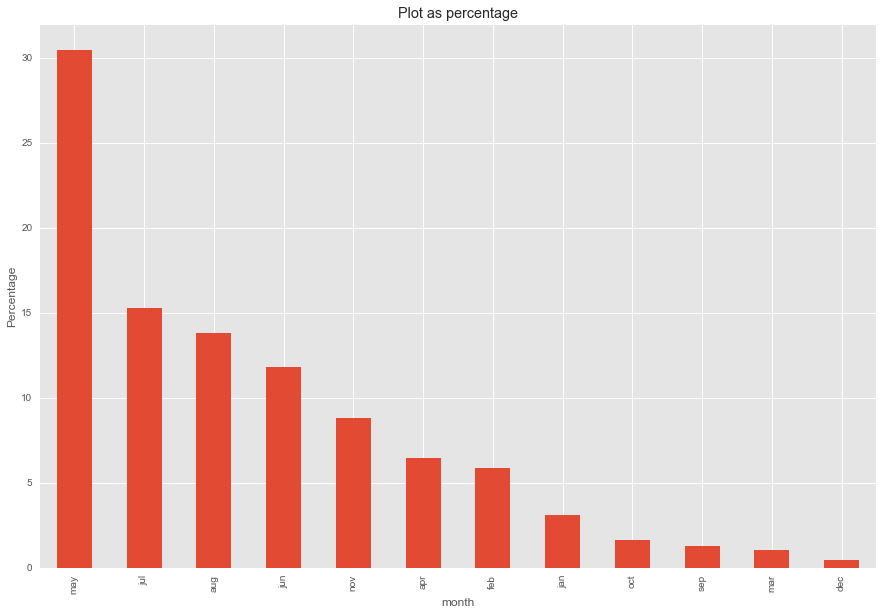

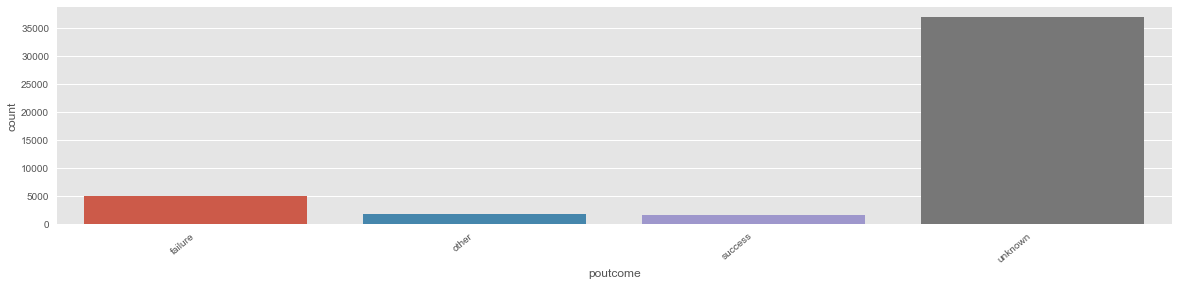

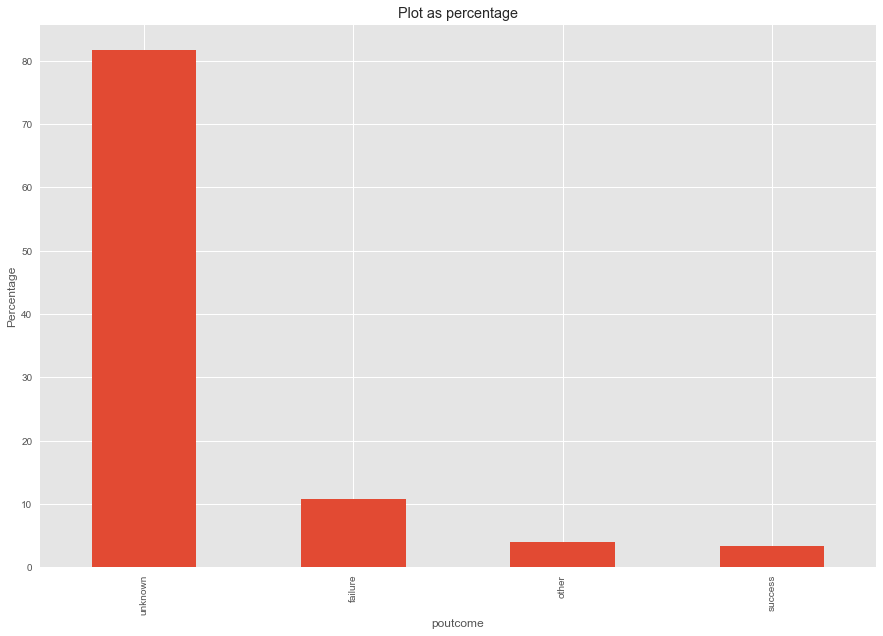

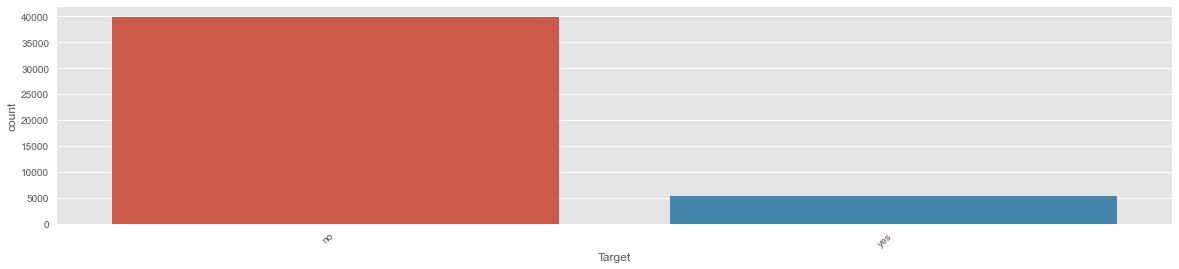

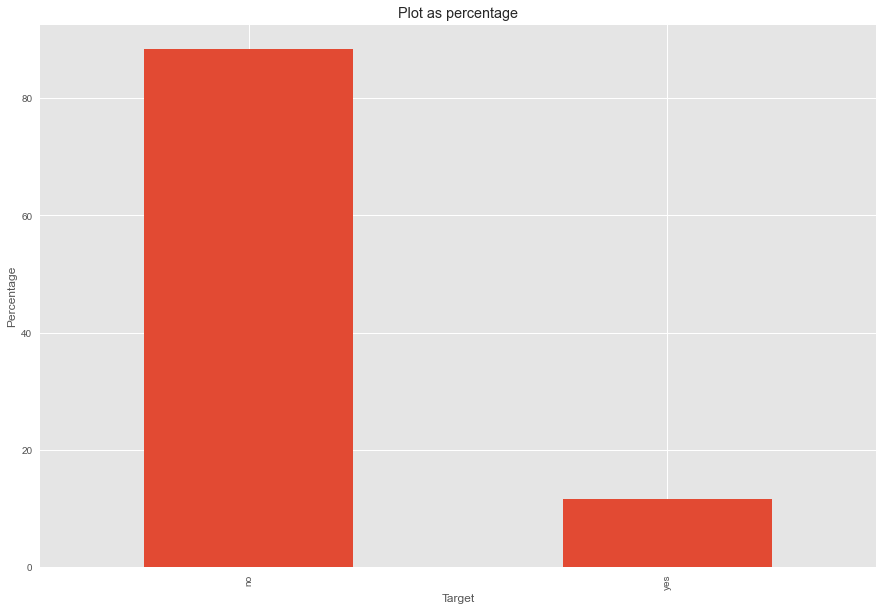

In [18]:
# distplot for categorical columns
for i in bd_class:
    plt.figure(figsize=(20,4))
    x = sns.countplot(bank_data[i])
    x.set_xticklabels(x.get_xticklabels(), rotation=40, ha="right")
    plt.show()
    print()
    plt.figure(figsize=(15,10))         # to increase figure size
    a= bank_data[i].value_counts()/ len(bank_data) *100
    plt.title('Plot as percentage')
    plt.xlabel(i)
    plt.ylabel('Percentage')
    a.plot.bar()

The countplots show us that we can probaly drop poutcome due to high number of unknown values. For education and job  we can probaly replace the unknown values with mode since they are very few

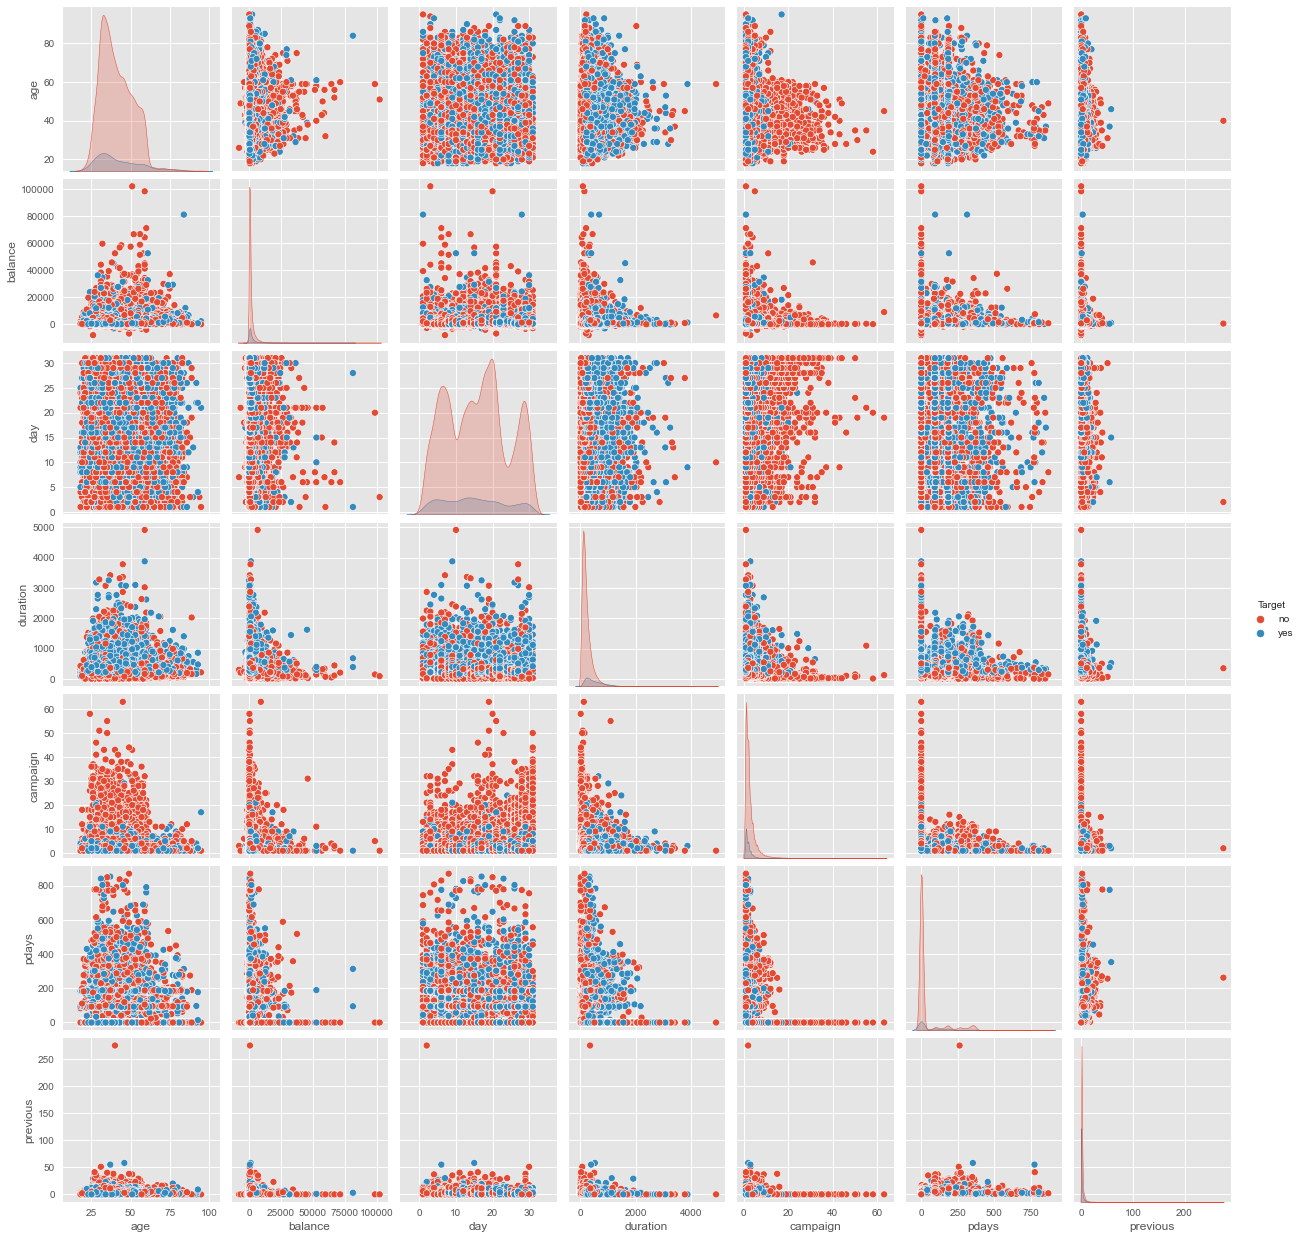

In [19]:
sns.pairplot(bank_data ,hue = 'Target', diag_kind='kde')
plt.show()

Insights from Pairplot

Its hard to see a strong correlation with any of the variables from the pair plot. more analysis will be needed

## Cleanup data before I do any further bivariate analysis

In [20]:
#lets first make a copy of oy main dataframe
bank_data2= bank_data.copy()

In [21]:
#remove unknown from "education" and "job" and "contact" using mode. 
bank_data2['education'].replace({'unknown' : bank_data2['education'].mode().values} , inplace=True)
bank_data2['education'].cat.remove_unused_categories(inplace=True)
bank_data2['contact'].replace({'unknown' : bank_data2['contact'].mode().values} , inplace=True)
bank_data2['contact'].cat.remove_unused_categories(inplace=True)
bank_data2['job'].replace({'unknown' : bank_data2['job'].mode().values} , inplace=True)
bank_data2['job'].cat.remove_unused_categories(inplace=True)

In [22]:
#lets also replace some of the ordinal features we identified earlier with integers in order
replaceStruct = {
                 "marital": {"single": 1, "married":2 , "divorced": 3},
                 "education": {"primary": 1, "secondary":2 , "tertiary": 3},
                 "default":     {"no": 1, "yes": 2 },
                 "housing":     {"no": 1, "yes": 2 },
                 "loan":     {"no": 1, "yes": 2 },
                 "month":     {"jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6, "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec":12},
                 "Target":    {"no": 0, "yes": 1 } 
                    }

In [23]:
# now lets replace the copied df with the replacestruct
bank_data2.replace(replaceStruct, inplace = True)

In [24]:
bank_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  int64   
 3   education  45211 non-null  int64   
 4   default    45211 non-null  int64   
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  int64   
 7   loan       45211 non-null  int64   
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  int64   
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  Target     45211 non-null  int64   
dtypes: category(3), int64(14)
memory usage: 5.0 MB


In [25]:
#lets quickly check how the values counts look now
for i in bd_class:
      print(bank_data2[i].value_counts())
      print() 

blue-collar      10020
management        9458
technician        7597
admin.            5171
services          4154
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
unknown              0
Name: job, dtype: int64

2    27214
1    12790
3     5207
Name: marital, dtype: int64

2    25059
3    13301
1     6851
Name: education, dtype: int64

1    44396
2      815
Name: default, dtype: int64

2    25130
1    20081
Name: housing, dtype: int64

1    37967
2     7244
Name: loan, dtype: int64

cellular     42305
telephone     2906
unknown          0
Name: contact, dtype: int64

5     13766
7      6895
8      6247
6      5341
11     3970
4      2932
2      2649
1      1403
10      738
9       579
3       477
12      214
Name: month, dtype: int64

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

0    39922
1     5289
Name: Target, dtype: int64



everything looks as expected. we didnt give values to contact as i will do simple one hot columns on it later

Next I will do couple of things:

- remove outliers from "pdays" and "previous" that we saw before

- We will do transformations on the following fields to remove skewness
"Balance", "pdays", "previous"" duration"



In [26]:
#for pdays, since -1 means no contact or nothing since 900 days, i am just goinmg to assign 900 for -1 indicating 900 days since contact
#bank_data2['pdays'].loc[bank_data2['pdays'] < 0] = 900

# I thought about doing this but the results were better when i did not do it. so I will leave this commented out

In [27]:
#remove outlier from previous- thete is one customer who had 275 previous contacts and is avery big outlier. we will replace it with mean. 
bank_data2['previous'].loc[bank_data2['previous'] > 200] = bank_data2['previous'].median()

In [28]:
#making a copy here for the decision tree model as for them this nomalization/transformation is not necessary

bank_data3 = bank_data2.copy()

In [29]:

#I tried the logistic regression model without removing the skewness and it was not very good. so no I will 
#remove the big skewness from some of the continuous variables, i am going to apply powertransform function from skleearn. i found out more about this from sklearn website and it made sense to use,
bank_data2['campaign'] = PowerTransformer(method = 'box-cox').fit_transform(bank_data2[['campaign']])
bank_data2['duration'] = PowerTransformer(method = 'yeo-johnson').fit_transform(bank_data2[['duration']])
bank_data2['previous'] = PowerTransformer(method = 'yeo-johnson').fit_transform(bank_data[['previous']])
bank_data2['pdays'] = PowerTransformer(method = 'yeo-johnson').fit_transform(bank_data2[['pdays']])
bank_data2['balance'] = PowerTransformer(method = 'yeo-johnson').fit_transform(bank_data2[['balance']])

In [30]:
bank_data2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,2,3,1,0.41,2,1,cellular,5,5,0.39,-1.13,-0.47,-0.47,unknown,0
1,44,technician,1,2,1,-0.41,2,1,cellular,5,5,-0.22,-1.13,-0.47,-0.47,unknown,0
2,33,entrepreneur,2,2,1,-0.43,2,2,cellular,5,5,-0.92,-1.13,-0.47,-0.47,unknown,0
3,47,blue-collar,2,2,1,0.20,2,1,cellular,5,5,-0.74,-1.13,-0.47,-0.47,unknown,0
4,33,blue-collar,1,2,1,-0.43,1,1,cellular,5,5,0.07,-1.13,-0.47,-0.47,unknown,0


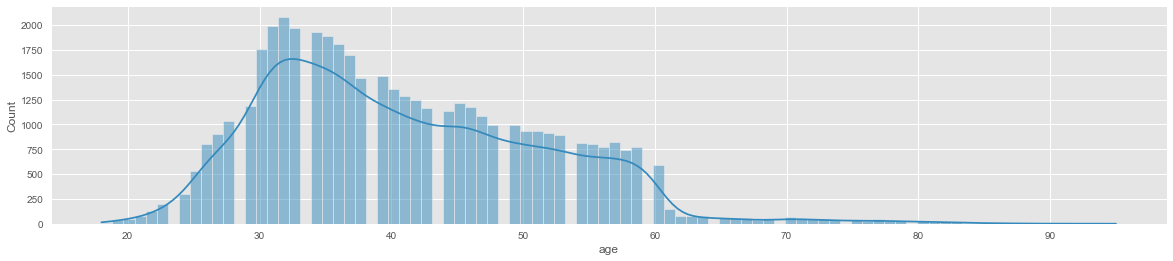

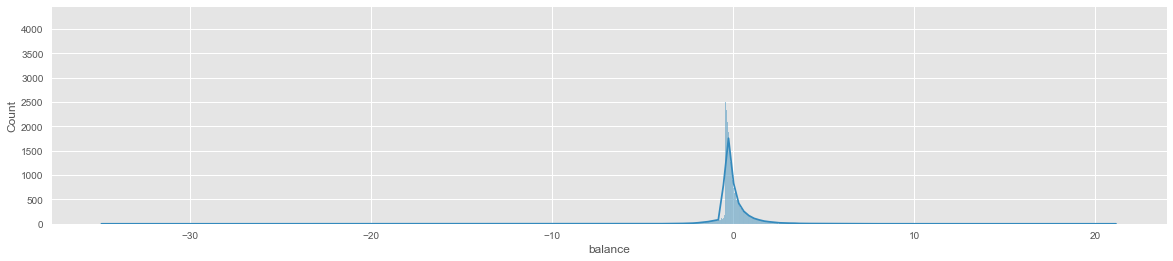

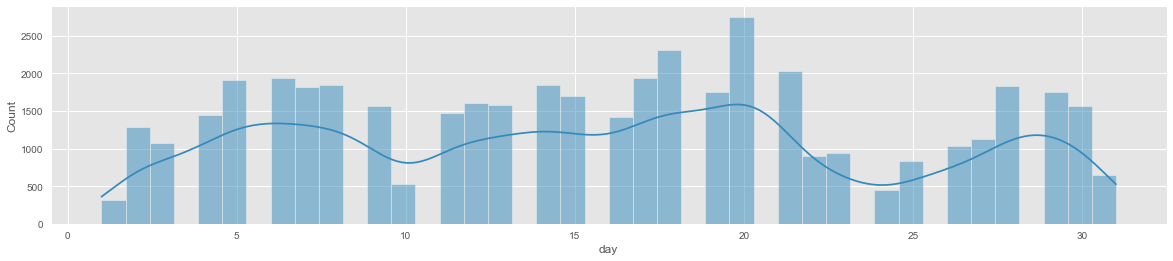

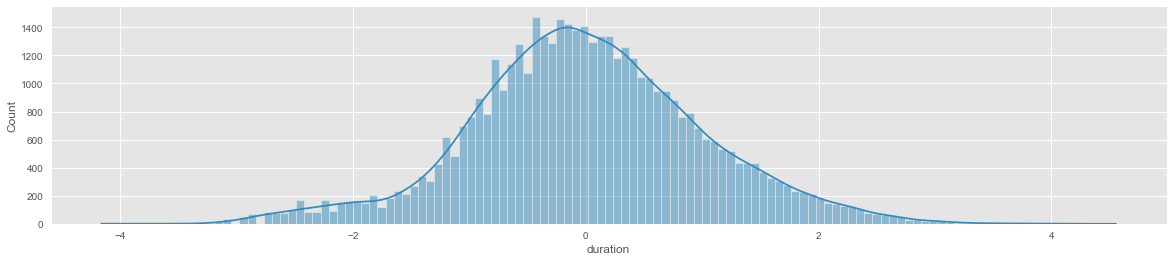

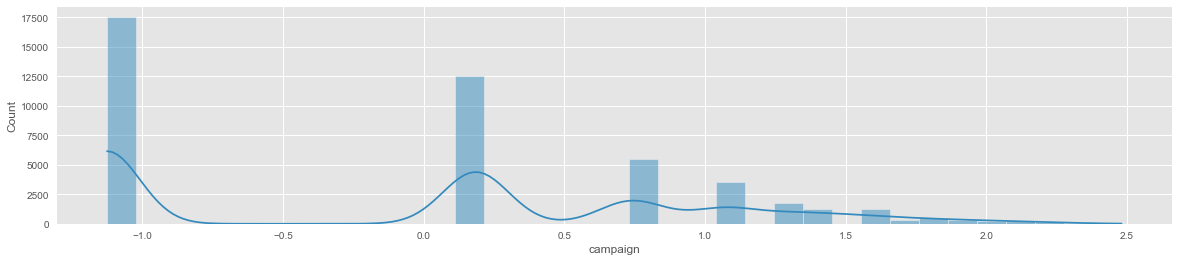

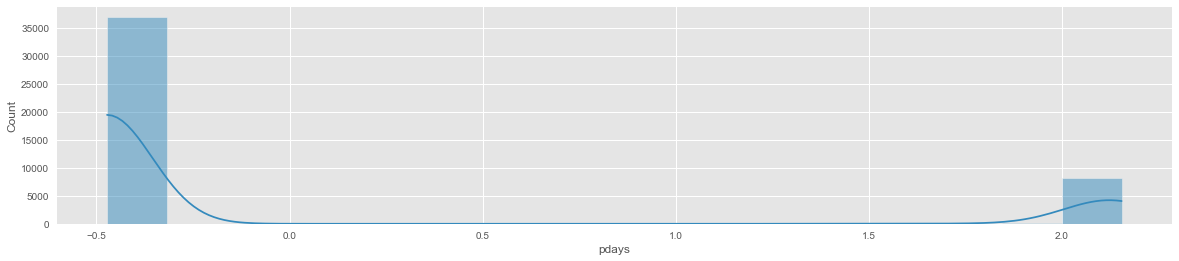

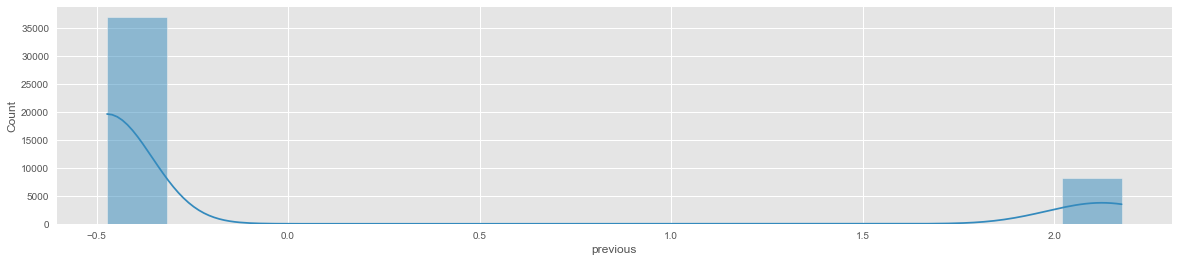

In [31]:
# distplot for continous columns- lets check again after transformation.
for i in bd_disc:
    plt.figure(figsize=(20,4))
    sns.histplot(bank_data2[i], kde = True)
    plt.show()

In [32]:
#skewness before
bank_data.skew()

age         0.68
balance     8.36
day         0.09
duration    3.14
campaign    4.90
pdays       2.62
previous   41.85
dtype: float64

In [33]:
#skewness after is much better- will help the logistic regression model
bank_data2[bd_disc].skew()

age        0.68
balance    1.10
day        0.09
duration   0.02
campaign   0.17
pdays      1.65
previous   1.65
dtype: float64

In [34]:
bank_data = bank_data2.copy()

In [35]:
# Let us look at the target column to 
#understand how the data is distributed amongst the various values
bank_data.groupby(["Target"]).mean()

,age,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous
Target,,,,,,,,,,,,,
0,40.84,1.84,2.13,1.02,-0.02,1.58,1.17,15.89,6.13,-0.13,0.03,-0.06,-0.06
1,41.67,1.76,2.27,1.01,0.19,1.37,1.09,15.16,6.27,0.99,-0.23,0.46,0.46


In [36]:
bank_data.groupby(["Target"]).median()

,age,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous
Target,,,,,,,,,,,,,
0,39,2,2,1,-0.22,2,1,16,6,-0.13,0.18,-0.47,-0.47
1,38,2,2,1,-0.09,1,1,15,6,0.97,0.18,-0.47,-0.47


#i dont gain much insights from this other than the fact that not much is needed now to do on the continuos variable

In [37]:
#also lets check some cross tabs to see the effect of the categorical variables on target. maybe we can drop some

for i in bd_class:
    x= pd.crosstab(bank_data['Target'],bank_data[i], normalize='columns')
    print(x)
    print()

job     admin.  blue-collar  entrepreneur  housemaid  management  retired  \
Target                                                                      
0         0.88         0.93          0.92       0.91        0.86     0.77   
1         0.12         0.07          0.08       0.09        0.14     0.23   

job     self-employed  services  student  technician  unemployed  
Target                                                            
0                0.88      0.91     0.71        0.89        0.84  
1                0.12      0.09     0.29        0.11        0.16  

marital    1    2    3
Target                
0       0.85 0.90 0.88
1       0.15 0.10 0.12

education    1    2    3
Target                  
0         0.91 0.89 0.85
1         0.09 0.11 0.15

default    1    2
Target           
0       0.88 0.94
1       0.12 0.06

housing    1    2
Target           
0       0.83 0.92
1       0.17 0.08

loan      1    2
Target          
0      0.87 0.93
1      0.13 0.07

contact  cell

Insights

- seems like contact makes no difference but i will just keep it.
- potcome can be dopped. too many of them are unknowns

### Lets cleanup and prepare the data based on the insights

In [38]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,2,3,1,0.41,2,1,cellular,5,5,0.39,-1.13,-0.47,-0.47,unknown,0
1,44,technician,1,2,1,-0.41,2,1,cellular,5,5,-0.22,-1.13,-0.47,-0.47,unknown,0
2,33,entrepreneur,2,2,1,-0.43,2,2,cellular,5,5,-0.92,-1.13,-0.47,-0.47,unknown,0
3,47,blue-collar,2,2,1,0.20,2,1,cellular,5,5,-0.74,-1.13,-0.47,-0.47,unknown,0
4,33,blue-collar,1,2,1,-0.43,1,1,cellular,5,5,0.07,-1.13,-0.47,-0.47,unknown,0


In [39]:
#Lets drop poutcome column
bank_data.drop(['poutcome'], axis = 1, inplace = True)
bank_data3.drop(['poutcome'], axis = 1, inplace = True)

In [40]:
#model for logistic regression

bd_model1 = bank_data.copy()

In [41]:
#model for Decsion tree and related ensemble algorithms 
bd_model2 = bank_data3.copy()

**Cleanup complete:**

- At this point we are done with the cleanup. we will just check everything one more time to make sure everything looks OK
- I do see imbalances in the data but i do not think any more treatment is required

## <a id = "link3"></a> Null Values Treatment

There are no Null values and hence no treatement is required

# We will build the following models using Sklearn

- Logistic Regression
- Decision Tree
- Bagging 
- Boosting- Adaboost
- Boosting- Gradientboost
- Random forest
- Make a DataFrame to compare models and their metrics. Give my conclusion regarding the best algorithm and the reason behind it.

# Logistic Regression Model

In [42]:
#Lets quickly check this dataframe to make sure our copy went well :-)
bd_model1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  int64   
 3   education  45211 non-null  int64   
 4   default    45211 non-null  int64   
 5   balance    45211 non-null  float64 
 6   housing    45211 non-null  int64   
 7   loan       45211 non-null  int64   
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  int64   
 11  duration   45211 non-null  float64 
 12  campaign   45211 non-null  float64 
 13  pdays      45211 non-null  float64 
 14  previous   45211 non-null  float64 
 15  Target     45211 non-null  int64   
dtypes: category(2), float64(5), int64(9)
memory usage: 4.9 MB


In [43]:
# Defining our X and Y variables so we can start building our logistic regression model.  we need to drop the dependent var
# from the X variable and put it in the Y varaible. also make sure it is a categorical variable 

X = bd_model1.drop('Target', axis=1)
Y = bd_model1['Target'].astype('category')  

In [44]:
#Convert categorical vriables to dummy variables. also doing the drop first to get rid of unecessary columns 
X = pd.get_dummies(X, columns = ['job','contact'], drop_first=True)

In [45]:
##Split into training and test set with 70:30 ratio with random state as 7
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=.3, random_state=22)
X_train.shape, X_test.shape

((31647, 26), (13564, 26))

In [46]:
#Lets also import all the functions from sklearn as we will be using them going forward

from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

#lets run the model
logreg = LogisticRegression(random_state=22)
# fit the model on train data
logreg.fit(X_train, y_train)                    

LogisticRegression(random_state=22)

In [47]:
 # Nows lets predict the target variable y_predict on test data
y_predict = logreg.predict(X_test)             

Training accuracy: 0.8926912503554839
Testing accuracy: 0.8897817752875258
Recall: 0.24952859836580768
Precision: 0.5687679083094556
F1 Score: 0.3468763652249891
Roc Auc Score: 0.6121943501308702
Confusion Matrix


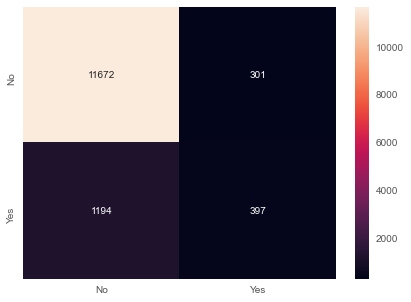

In [48]:
#Lets also print the Training, Testing accuracy, Confusion matric heat map, Recall, Precison, F1 Score and Roc AUC Score
y_predict = logreg.predict(X_test)
Training_accuracy = logreg.score(X_train,y_train)
Testing_accuracy = logreg.score(X_test, y_test)
Recall= recall_score(y_test,y_predict)
Precision = precision_score(y_test,y_predict)
F1_Score = f1_score(y_test,y_predict)
Roc_Auc_Score = roc_auc_score(y_test,y_predict)

print("Training accuracy:", Training_accuracy)  
print("Testing accuracy:", Testing_accuracy)
print("Recall:", Recall) 
print("Precision:", Precision)
print("F1 Score:",F1_Score)
print("Roc Auc Score:", Roc_Auc_Score)
print('Confusion Matrix')

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

Insights

Although the accuracy of our model is very good. it is mostly because majority of predictions as False negatives. this is not a very good score to go after.
Lets take a look at precision and recall.
Although the precsion seems OK, which means that our Ture positive predictions over the total number of true predictions is above 50%. 
It seem the the recall of our model is very low and it is mainly because of high number of False negatives.

To get a good model for this bank we need to have less number of false negatives as false negatives mean that our model predicted that the customer will not subscribe to the term deposit whereas in reality they did. this will mean that bank will miss out on trageting these customers if they just follow the model. so our goal should be to improve recall. Since the recall is very poor, lets try some other models. but first lets also see other metrics

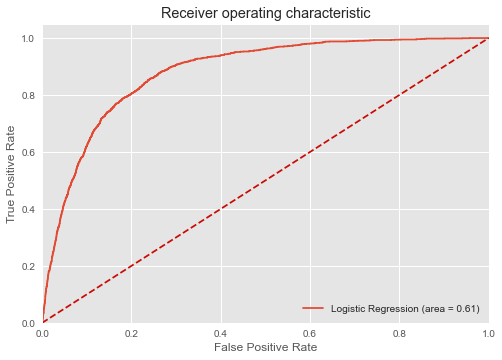

In [49]:
#as we also learned in our mentor sessions we can print the ROC curve
# !pip install yellowbrick

# Additional

#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

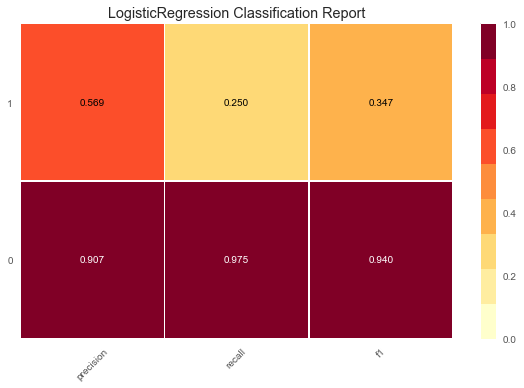

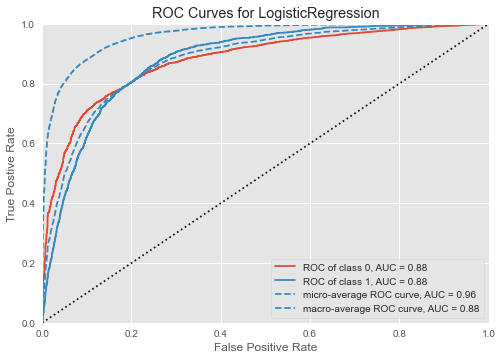

In [50]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(logreg)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(logreg)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()


from sklearn.metrics import precision_recall_fscore_support as score
predicted = logreg.predict(X_test)
precision1, recall1, fscore1, support1 = score(y_test, predicted)
recall_class1 = (recall1[1])

These classification metrics tell us the same story. 

but first lets understand what these classification metrics actually mean

- __Precision__: Fraction of actuals per label that were correctly classified by the model
- __Recall__: Fraction of predictions that were correctly classified by the model
- __F1-score__: Weighted harmonic mean of the precision and recall. F1-score: 2 * (precision * recall) / (precision + recall)
- __Support__: Number of occurrences of each class in y_test
- __Accuracy__: Fraction of all observations that were correctly classified by the model
- __Macro avg__: Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account
- __Micro/weighted avg__: Calculate metrics globally by counting the total true positives, false negatives and false positives
- __AUC Score__: Given a random observation from the dataset that belongs to a class, and a random observation that doesn't belong to a class, the AUC is the perecentage of time that our model will classify which is which correctly


Although overall the classification metrics are good, its mostly because of the model predicting the class "No" or "0" correctly. The metric that is important to us is recall which in this case is low for the class "Yes" which we are really interested in. 

lets check other models

In [51]:
## Find out coefficients of all the attributes and show the output in a data frame with column names
fi = pd.DataFrame()
fi['Col'] = X_train.columns
fi['Coeff'] = np.round(abs(logreg.coef_[0]),2)
fi.sort_values(by='Coeff',ascending=False)

,Col,Coeff
9,duration,1.48
5,housing,1.04
6,loan,0.59
20,job_student,0.55
17,job_retired,0.53
13,job_blue-collar,0.38
14,job_entrepreneur,0.32
12,previous,0.29
3,default,0.29
2,education,0.26


Insights

It seems that "Duration", "Housing" and "loan" are three of the most important featurs. next the job related features are also important.

In [52]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf1 = pd.DataFrame({'Method':['Logistic Regression'], 'accuracy': Testing_accuracy, 'Recall': Recall, 'Recall_Class1': recall_class1, 'Precision': Precision, 'F1 Score': F1_Score, 'Roc Auc Score': Roc_Auc_Score})
resultsDf1 = resultsDf1[['Method', 'accuracy', 'Recall', 'Recall_Class1', 'Precision', 'F1 Score', 'Roc Auc Score']]
resultsDf1

,Method,accuracy,Recall,Recall_Class1,Precision,F1 Score,Roc Auc Score
0,Logistic Regression,0.89,0.25,0.25,0.57,0.35,0.61


# Now lets build the Decision Tree Model

In [53]:
#Before we start the DT model lets do some preprocessing
#Convert categorical vriables to dummy variables. also doing the drop first to get rid of unecessary columns 
from sklearn import preprocessing
# creating instance of labelencoder as we will use it for the job and contact variables
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
bd_model2['job_cat'] = labelencoder.fit_transform(bd_model2['job'])
bd_model2['cont_cat'] = labelencoder.fit_transform(bd_model2['contact'])


In [54]:
X = bd_model2.drop(['Target', 'job', 'contact'], axis=1)
Y = bd_model2['Target'].astype('category')     

In [55]:
X

,age,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,job_cat,cont_cat
0,58,2,3,1,2143,2,1,5,5,261,1,-1,0.00,4,0
1,44,1,2,1,29,2,1,5,5,151,1,-1,0.00,9,0
2,33,2,2,1,2,2,2,5,5,76,1,-1,0.00,2,0
3,47,2,2,1,1506,2,1,5,5,92,1,-1,0.00,1,0
4,33,1,2,1,1,1,1,5,5,198,1,-1,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,2,3,1,825,1,1,17,11,977,3,-1,0.00,9,0
45207,71,3,1,1,1729,1,1,17,11,456,2,-1,0.00,5,0
45208,72,2,2,1,5715,1,1,17,11,1127,5,184,3.00,5,0
45209,57,2,2,1,668,1,1,17,11,508,4,-1,0.00,1,1


In [56]:
# invoking the decision tree classifier function. Using 'gini' method of finding the split columns. Other option 
# could be entropy index.  

model_gini = DecisionTreeClassifier(criterion='gini', random_state=22)

In [57]:
#Lets fit the model
model_gini.fit(X_train, y_train)

DecisionTreeClassifier(random_state=22)

#### Print the accuracy of the model & print the confusion matrix

In [58]:
print("Train: %.2f" % model_gini.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % model_gini.score(X_test, y_test))  # performance on test data

Train: 1.00
Test: 0.87


There is a high degree of overfitting in the model due to which the test accuracy drops drastically. lets try to reduce overfitting by pruning

#### Regularize/prune the decision tree by limiting the max. depth of trees and print the accuracy.

In [59]:
#i am going with depth of 5
clf_pruned = DecisionTreeClassifier(criterion = "gini", max_depth=5)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [60]:
print("Train: %.2f" % clf_pruned.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % clf_pruned.score(X_test, y_test))  # performance on test data

Train: 0.90
Test: 0.89


It seems much better now and overfitting has been reduced. Now lets visualize

In [61]:
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
import pydotplus
import graphviz

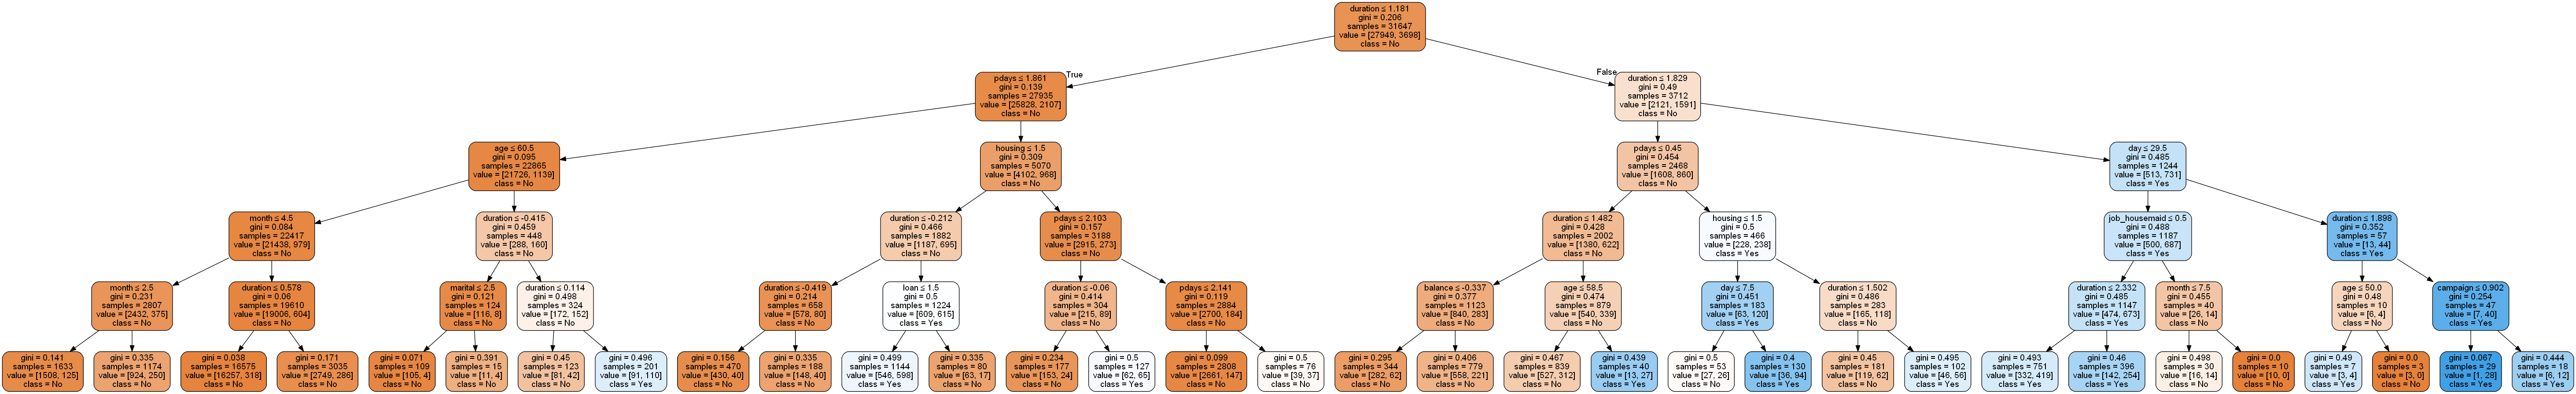

In [62]:
dot_data = StringIO()
train_char_label = ['No', 'Yes']
export_graphviz(clf_pruned, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = list(X_train), class_names=list(train_char_label))
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('bd_pruned.png')
Image(graph.create_png())

Training accuracy: 0.8954403260972604
Testing accuracy: 0.8891182542023002
Recall: 0.4330609679446889
Precision: 0.533694810224632
F1 Score: 0.47814018043025674
Roc Auc Score: 0.691390585868277
Confusion Matrix


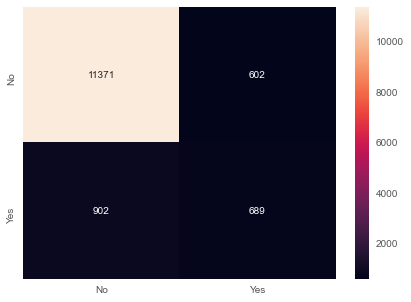

In [63]:
#Lets also print the Training, Testing accuracy, Confusion matric heat map, Recall, Precison, F1 Score and Roc AUC Score
y_predict = clf_pruned.predict(X_test)
Training_accuracy = clf_pruned.score(X_train,y_train)
Testing_accuracy = clf_pruned.score(X_test, y_test)
Recall= recall_score(y_test,y_predict)
Precision = precision_score(y_test,y_predict)
F1_Score = f1_score(y_test,y_predict)
Roc_Auc_Score = roc_auc_score(y_test,y_predict)

print("Training accuracy:", Training_accuracy)  
print("Testing accuracy:", Testing_accuracy)
print("Recall:", Recall) 
print("Precision:", Precision)
print("F1 Score:",F1_Score)
print("Roc Auc Score:", Roc_Auc_Score)
print('Confusion Matrix')

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

Seems like the Decision tree model has been able to drastically imporve the recall score while maintaining or improving other scores. This means this model will have fewer False negatives in the prediction helping babk better identify customers who will subscribe to the term loan. lets also look at the classification metrics

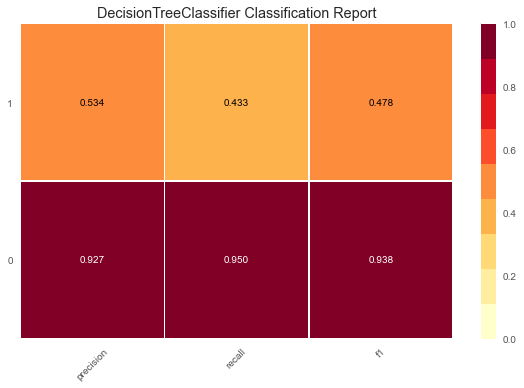

ClassificationReport(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000002153FB04E80>,
                     cmap=<matplotlib.colors.ListedColormap object at 0x000002154030ED30>,
                     model=None)


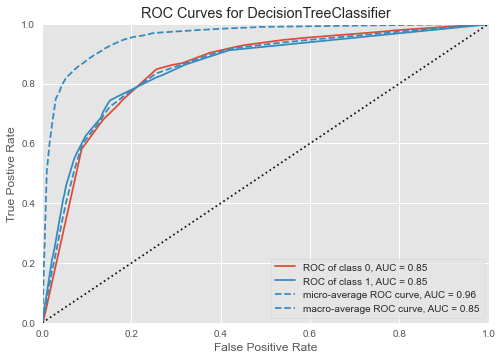

In [64]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(clf_pruned)
r= viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()
print(viz)

roc = ROCAUC(clf_pruned)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

predicted = clf_pruned.predict(X_test)
precision1, recall1, fscore1, support1 = score(y_test, predicted)
recall_class1 = (recall1[1])


As expected we can see the the recall score for each class has greatly improved and this means our model is predicting better. 

Accuracy and precision has also remained strong as before

In [65]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf2 = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': Testing_accuracy, 'Recall': Recall, 'Recall_Class1': recall_class1, 'Precision': Precision, 'F1 Score': F1_Score, 'Roc Auc Score': Roc_Auc_Score})
resultsDf2 = resultsDf2[['Method', 'accuracy', 'Recall', 'Recall_Class1', 'Precision', 'F1 Score', 'Roc Auc Score']]
resultsDf2

,Method,accuracy,Recall,Recall_Class1,Precision,F1 Score,Roc Auc Score
0,Decision Tree,0.89,0.43,0.43,0.53,0.48,0.69


In [66]:
## Calculating feature importance
features = list(X_train)
feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)
feat_imp_dict = dict(zip(features, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
duration,0.63
pdays,0.14
housing,0.11
age,0.05
month,0.04
loan,0.01
day,0.00
balance,0.00
job_housemaid,0.00
campaign,0.00


In this DT model, it seem the one common variable to logistic regression variable in level of importance is "Duration". however for DT model the next important feature is pdays. Housing and age also seem to have importance in the DT model. 

Next we will run some ensemble mehods and we will capture all the mterics and then analyze them in the end.

# Ensemble Learning - Bagging

In [67]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(n_estimators=50,random_state=22)
bgcl = bgcl.fit(X_train, y_train)

Training accuracy: 0.999715612854299
Testing accuracy: 0.9014302565614863
Recall: 0.4676304211187932
Precision: 0.6029173419773096
F1 Score: 0.5267256637168142
Roc Auc Score: 0.7133525028002718
Confusion Matrix


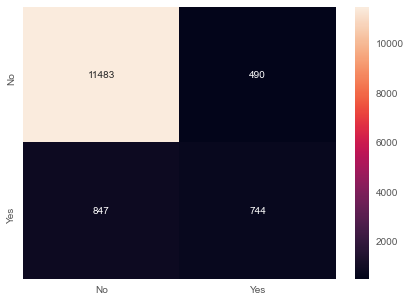

In [68]:

#Lets also print the Training, Testing accuracy, Confusion matric heat map, Recall, Precison, F1 Score and Roc AUC Score
y_predict = bgcl.predict(X_test)
Training_accuracy = bgcl.score(X_train,y_train)
Testing_accuracy = bgcl.score(X_test, y_test)
Recall= recall_score(y_test,y_predict)
Precision = precision_score(y_test,y_predict)
F1_Score = f1_score(y_test,y_predict)
Roc_Auc_Score = roc_auc_score(y_test,y_predict)

print("Training accuracy:", Training_accuracy)  
print("Testing accuracy:", Testing_accuracy)
print("Recall:", Recall) 
print("Precision:", Precision)
print("F1 Score:",F1_Score)
print("Roc Auc Score:", Roc_Auc_Score)
print('Confusion Matrix')

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

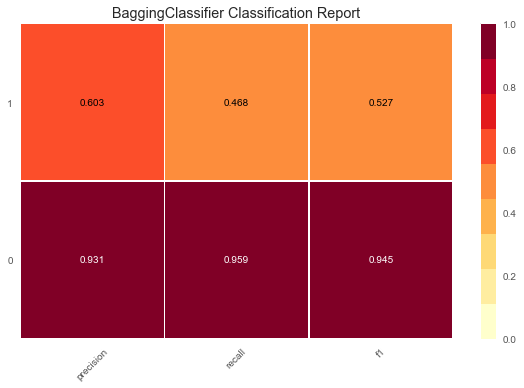

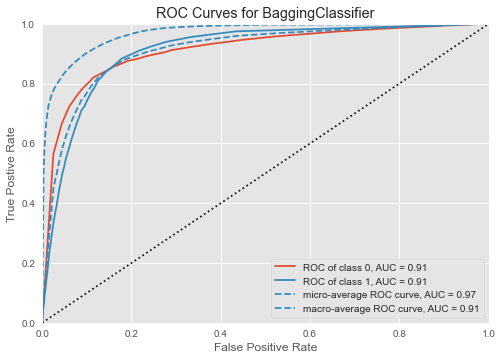

In [69]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(bgcl)
viz.fit(X_train, y_train)
r= viz.score(X_test, y_test)
viz.show()


roc = ROCAUC(bgcl)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

predicted = bgcl.predict(X_test)
precision1, recall1, fscore1, support1 = score(y_test, predicted)
recall_class1 = (recall1[1])

In [70]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf3 = pd.DataFrame({'Method':['Bagging'], 'accuracy': Testing_accuracy, 'Recall': Recall, 'Recall_Class1': recall_class1, 'Precision': Precision, 'F1 Score': F1_Score, 'Roc Auc Score': Roc_Auc_Score})
resultsDf3 = resultsDf3[['Method', 'accuracy', 'Recall', 'Recall_Class1', 'Precision', 'F1 Score', 'Roc Auc Score']]
resultsDf3

,Method,accuracy,Recall,Recall_Class1,Precision,F1 Score,Roc Auc Score
0,Bagging,0.90,0.47,0.47,0.60,0.53,0.71


Bagging deifinitely improves the scores across the board. Accuracy is up, recall is up, precision is up and so is F1 Score and Roc Auc Score. even at the classification metrics level, the recall for class "1" is better, telling us that this model predicts customers that will subscribe to term loan better than the Decision tree model

# Ensemble Learning - AdaBoosting

In [71]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=22)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(X_train, y_train)

Training accuracy: 0.8805258002338294
Testing accuracy: 0.8799026835741669
Recall: 0.2972972972972973
Precision: 0.4806910569105691
F1 Score: 0.367378640776699
Roc Auc Score: 0.6273089676998472
Confusion Matrix


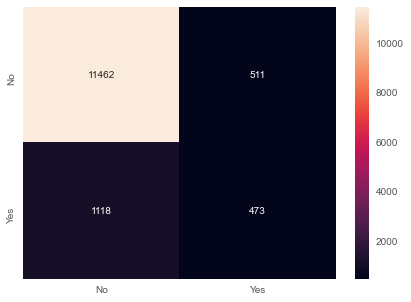

In [72]:
#Lets also print the Training, Testing accuracy, Confusion matric heat map, Recall, Precison, F1 Score and Roc AUC Score
y_predict = abcl.predict(X_test)
Training_accuracy = abcl.score(X_train,y_train)
Testing_accuracy = abcl.score(X_test, y_test)
Recall= recall_score(y_test,y_predict)
Precision = precision_score(y_test,y_predict)
F1_Score = f1_score(y_test,y_predict)
Roc_Auc_Score = roc_auc_score(y_test,y_predict)

print("Training accuracy:", Training_accuracy)  
print("Testing accuracy:", Testing_accuracy)
print("Recall:", Recall) 
print("Precision:", Precision)
print("F1 Score:",F1_Score)
print("Roc Auc Score:", Roc_Auc_Score)
print('Confusion Matrix')



cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

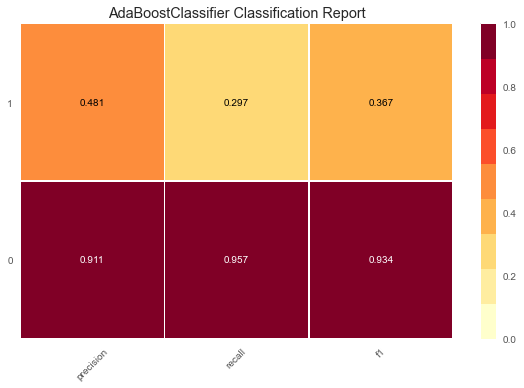

0.9014302565614863


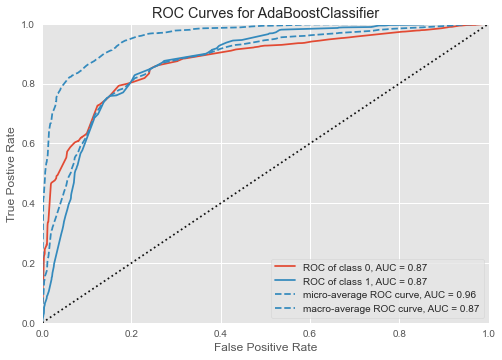

In [73]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(abcl)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()
print(r)

roc = ROCAUC(abcl)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

predicted = abcl.predict(X_test)
precision1, recall1, fscore1, support1 = score(y_test, predicted)
recall_class1 = (recall1[1])

In [74]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf4 = pd.DataFrame({'Method':['Ada Boost'], 'accuracy': Testing_accuracy, 'Recall': Recall, 'Recall_Class1': recall_class1, 'Precision': Precision, 'F1 Score': F1_Score, 'Roc Auc Score': Roc_Auc_Score})
resultsDf4 = resultsDf4[['Method', 'accuracy', 'Recall', 'Recall_Class1', 'Precision', 'F1 Score', 'Roc Auc Score']]
resultsDf4

,Method,accuracy,Recall,Recall_Class1,Precision,F1 Score,Roc Auc Score
0,Ada Boost,0.88,0.30,0.30,0.48,0.37,0.63


Looking at the boosting model versus the previous bagging model, we can see that the recall has decreased among other metrics. even though for individual classification metrics, the recall, precsion, F1 scores are good for "No"/"0" class, they are poor for the "Yes" class which we are really interested in., So overall this is a poor model compared to decsion trees.

# Ensemble Learning - GradientBoost

In [75]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=22)
gbcl = gbcl.fit(X_train, y_train)


Training accuracy: 0.9008752804373242
Testing accuracy: 0.8959009141846063
Recall: 0.3035826524198617
Precision: 0.613722998729352
F1 Score: 0.4062237174095879
Roc Auc Score: 0.6390960952736575
Confusion Matrix
0.8959009141846063


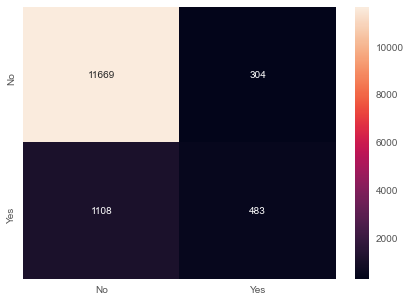

In [76]:
#Lets also print the Training, Testing accuracy, Confusion matric heat map, Recall, Precison, F1 Score and Roc AUC Score
y_predict = gbcl.predict(X_test)
Training_accuracy = gbcl.score(X_train,y_train)
Testing_accuracy = gbcl.score(X_test, y_test)
Recall= recall_score(y_test,y_predict)
Precision = precision_score(y_test,y_predict)
F1_Score = f1_score(y_test,y_predict)
Roc_Auc_Score = roc_auc_score(y_test,y_predict)

print("Training accuracy:", Training_accuracy)  
print("Testing accuracy:", Testing_accuracy)
print("Recall:", Recall) 
print("Precision:", Precision)
print("F1 Score:",F1_Score)
print("Roc Auc Score:", Roc_Auc_Score)
print('Confusion Matrix')



print(gbcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [77]:
#Lets also print the Training, Testing accuracy, Confusion matric heat map, Recall, Precison, F1 Score and Roc AUC Score
Traning_accuracy = gbcl.score(X_train,y_train)
Testing_accuracy = gbcl.score(X_test, y_test)
Recall= recall_score(y_test,y_predict)
Precision = precision_score(y_test,y_predict)
F1_Score = f1_score(y_test,y_predict)
Roc_Auc_Score = roc_auc_score(y_test,y_predict)

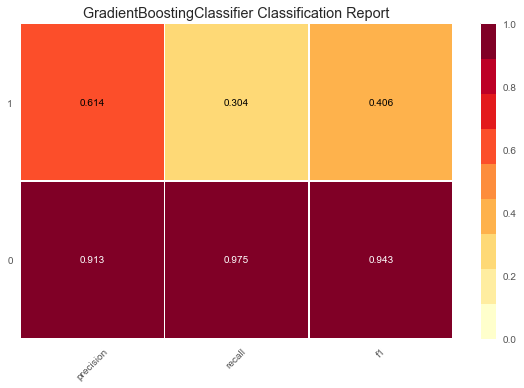

0.9014302565614863


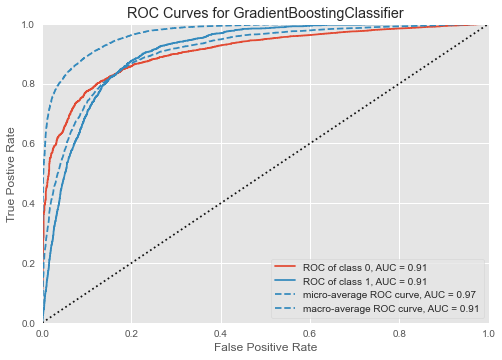

In [78]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(gbcl)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()
print(r)

roc = ROCAUC(gbcl)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

predicted = gbcl.predict(X_test)
precision1, recall1, fscore1, support1 = score(y_test, predicted)
recall_class1 = (recall1[1])

In [79]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf5 = pd.DataFrame({'Method':['Gradient Boost'], 'accuracy': Testing_accuracy, 'Recall': Recall, 'Recall_Class1': recall_class1, 'Precision': Precision, 'F1 Score': F1_Score, 'Roc Auc Score': Roc_Auc_Score})
resultsDf5 = resultsDf5[['Method', 'accuracy', 'Recall', 'Recall_Class1', 'Precision', 'F1 Score', 'Roc Auc Score']]
resultsDf5

,Method,accuracy,Recall,Recall_Class1,Precision,F1 Score,Roc Auc Score
0,Gradient Boost,0.90,0.30,0.30,0.61,0.41,0.64


Same analysis as Adaboost although overall gradientboost produced better accuracy and precision and F1 score. However the importanct score of recall is the same.

Looking at the boosting model versus the previous bagging model, we can see that the recall has decreased among other metrics. even though for individual classification metrics, the recall, precsion, F1 scores are good for "No"/"0" class, they are poor for the "Yes" class which we are really interested in., So overall this is a poor model compared to decsion trees. 

# Ensemble RandomForest Classifier

In [80]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=22,max_features=12)
rfcl = rfcl.fit(X_train, y_train)

Training accuracy: 0.9998104085695326
Testing accuracy: 0.9003981126511353
Recall: 0.4355751099937146
Precision: 0.6047120418848168
F1 Score: 0.5063938618925832
Roc Auc Score: 0.6988699904766869
Confusion Matrix
0.9003981126511353


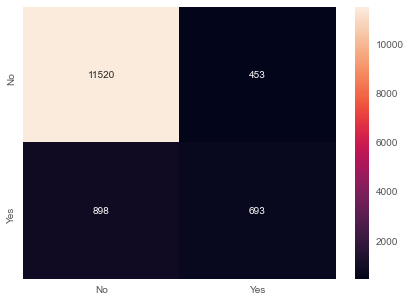

In [81]:
#Lets also print the Training, Testing accuracy, Confusion matric heat map, Recall, Precison, F1 Score and Roc AUC Score
y_predict = rfcl.predict(X_test)
Training_accuracy = rfcl.score(X_train,y_train)
Testing_accuracy = rfcl.score(X_test, y_test)
Recall= recall_score(y_test,y_predict)
Precision = precision_score(y_test,y_predict)
F1_Score = f1_score(y_test,y_predict)
Roc_Auc_Score = roc_auc_score(y_test,y_predict)

print("Training accuracy:", Training_accuracy)  
print("Testing accuracy:", Testing_accuracy)
print("Recall:", Recall) 
print("Precision:", Precision)
print("F1 Score:",F1_Score)
print("Roc Auc Score:", Roc_Auc_Score)
print('Confusion Matrix')


print(rfcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

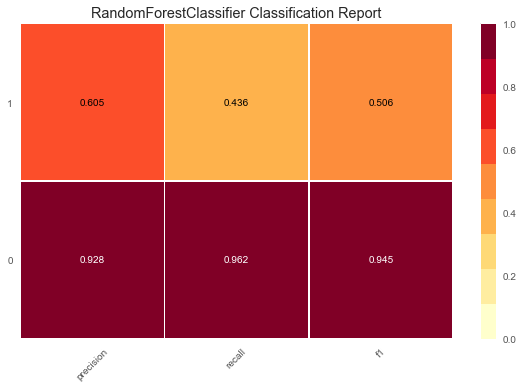

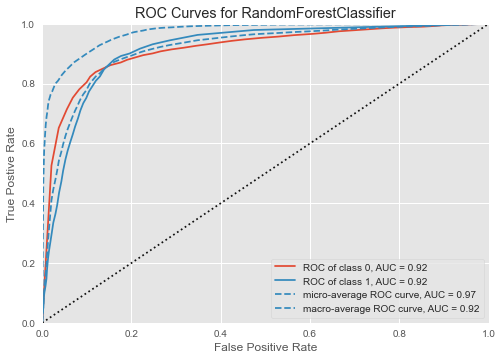

In [82]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(rfcl)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()


roc = ROCAUC(rfcl)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

predicted = rfcl.predict(X_test)
precision1, recall1, fscore1, support1 = score(y_test, predicted)
recall_class1 = (recall1[1])

In [83]:
resultsDf6 = pd.DataFrame({'Method':['Random Forest'], 'accuracy': Testing_accuracy, 'Recall': Recall, 'Recall_Class1': recall_class1, 'Precision': Precision, 'F1 Score': F1_Score, 'Roc Auc Score': Roc_Auc_Score})
resultsDf6 = resultsDf6[['Method', 'accuracy', 'Recall', 'Recall_Class1', 'Precision', 'F1 Score', 'Roc Auc Score']]
resultsDf6

,Method,accuracy,Recall,Recall_Class1,Precision,F1 Score,Roc Auc Score
0,Random Forest,0.90,0.44,0.44,0.60,0.51,0.70


Similar to simple bagging, the random forest which is the another algorithm of bagging, also has better results than bossting models. although compared to the bagging model itself the reults are slightly (very slighly) poor. 

# Final Analysis

In [84]:
#Lets collect all the results of all the models- LR, DT and ensemble models in one dataframe

final_resultsdf = pd.concat([resultsDf1, resultsDf2, resultsDf3, resultsDf4, resultsDf5, resultsDf6], ignore_index=True)

In [85]:
#Lets look at the results

final_resultsdf

,Method,accuracy,Recall,Recall_Class1,Precision,F1 Score,Roc Auc Score
0,Logistic Regression,0.89,0.25,0.25,0.57,0.35,0.61
1,Decision Tree,0.89,0.43,0.43,0.53,0.48,0.69
2,Bagging,0.90,0.47,0.47,0.60,0.53,0.71
3,Ada Boost,0.88,0.30,0.30,0.48,0.37,0.63
4,Gradient Boost,0.90,0.30,0.30,0.61,0.41,0.64
5,Random Forest,0.90,0.44,0.44,0.60,0.51,0.70


Although the accuracy for all the models is very good at around 90%, that does not mean all of them are good as accuracy is not a good representation here. What we need to look at here is the Recall as that gives us the best sensitivity meaning the least false negatives. We need a model that gives us the most accurate predictions for True positives and least number of false negatives. We can live with false positives as that will mean that bank will target someone who will not subscrive, but a false negative will mean they will not target a customer that is inclined to subscribe.

Keeping true to this logic, i feel that the best model is the "Bagging" model as it has the highest accuracy and the highest Recall and highest Roc AUC score of all models. a close second is "Random Forest" model. The bank should use the bagging algorithm model